$$Pupipat\ Singkhorn$$

# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [1]:
import numpy as np
np.random.seed(42)
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    # Axes
    'axes.titlesize': 16,
    'axes.titlepad': 20,
    'axes.labelsize': 12,
    'axes.edgecolor': (0.1, 0.1, 0.1),
    'axes.labelcolor': (0.1, 0.1, 0.1),
    'axes.linewidth': 1,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.grid': True,

    # Grid
    'grid.alpha': 0.7,
    'grid.linestyle': '--',
    'grid.linewidth': 0.6,

    # Lines
    'lines.linewidth': 1.5,
    'lines.markeredgewidth': 0.0,

    # Scatter plot
    'scatter.marker': 'x',

    # Ticks
    'xtick.labelsize': 12,
    'xtick.color': (0.1, 0.1, 0.1),
    'xtick.direction': 'in',
    'ytick.labelsize': 12,
    'ytick.color': (0.1, 0.1, 0.1),
    'ytick.direction': 'in',

    # Figure output
    'figure.figsize': (10, 6),
    'figure.dpi': 200,
    'savefig.dpi': 200,

    # Text
    'text.color': (0.2, 0.2, 0.2),

    # Font
    "font.family": ["serif",
                    "Tahoma"] # TH Font
})

In [3]:
def sample_normal(sample_size=10, mu=0, std=1):
  # TODO#1.1: #
  ##
  return norm.rvs(loc=mu, scale=std, size=sample_size)


def sample_bernoulli(sample_size=10, p=0.3):
  # TODO#1.2:
  ##
  return bernoulli.rvs(p, size=sample_size)


def sample_binomial(sample_size=10, n=10, p=0.3):
  # TODO#1.3:
  ##
  return binom.rvs(n, p, size=sample_size)


def sample_multinomial(sample_size=10, n=100, p=[0.3, 0.2, 0.5]):
  # TODO#1.4:
  ##
  return multinomial.rvs(n, p, size=sample_size)


def sample_uniform(sample_size=10, from_x=0, to_x=1):
  # TODO#1.5:
  ##
  return uniform.rvs(loc=from_x, scale=to_x - from_x, size=sample_size)


def sample_triangle(sample_size=10, a=0, b=1):
  # TODO#1.6:
  ##
  mid = (a + b) / 2
  samples = np.random.triangular(left=a, mode=mid, right=b, size=sample_size)
  return samples


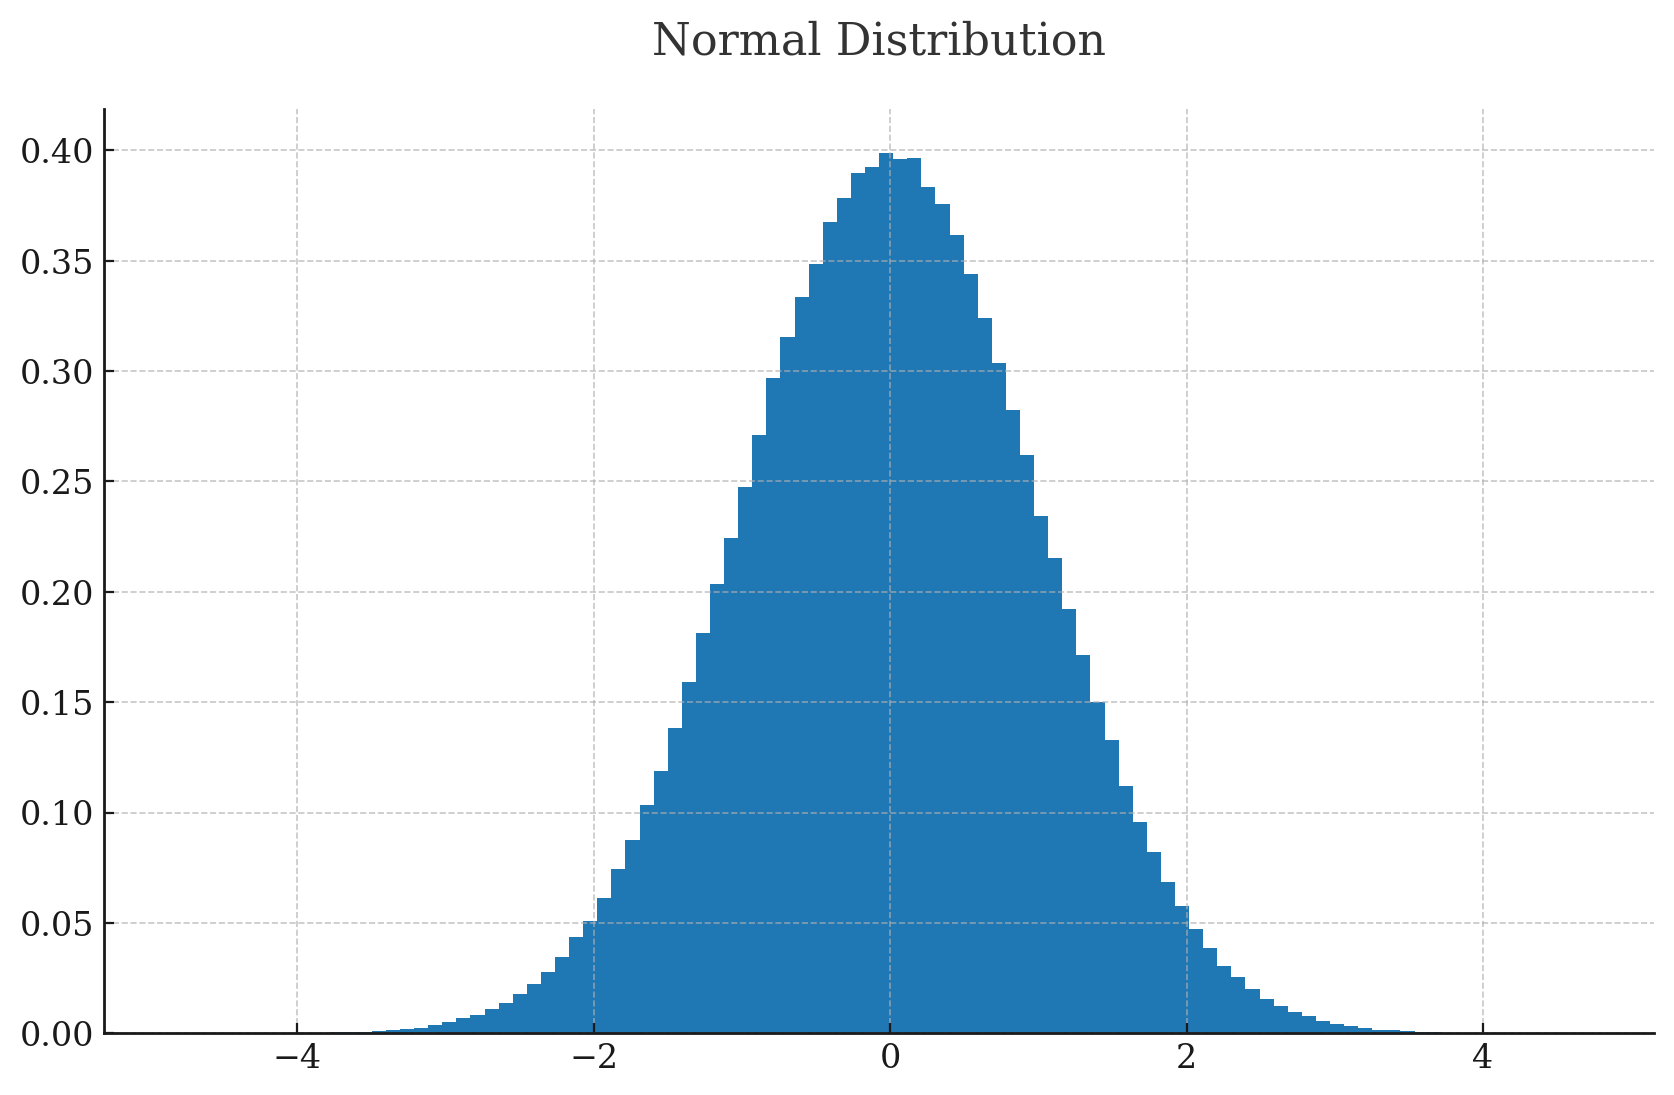

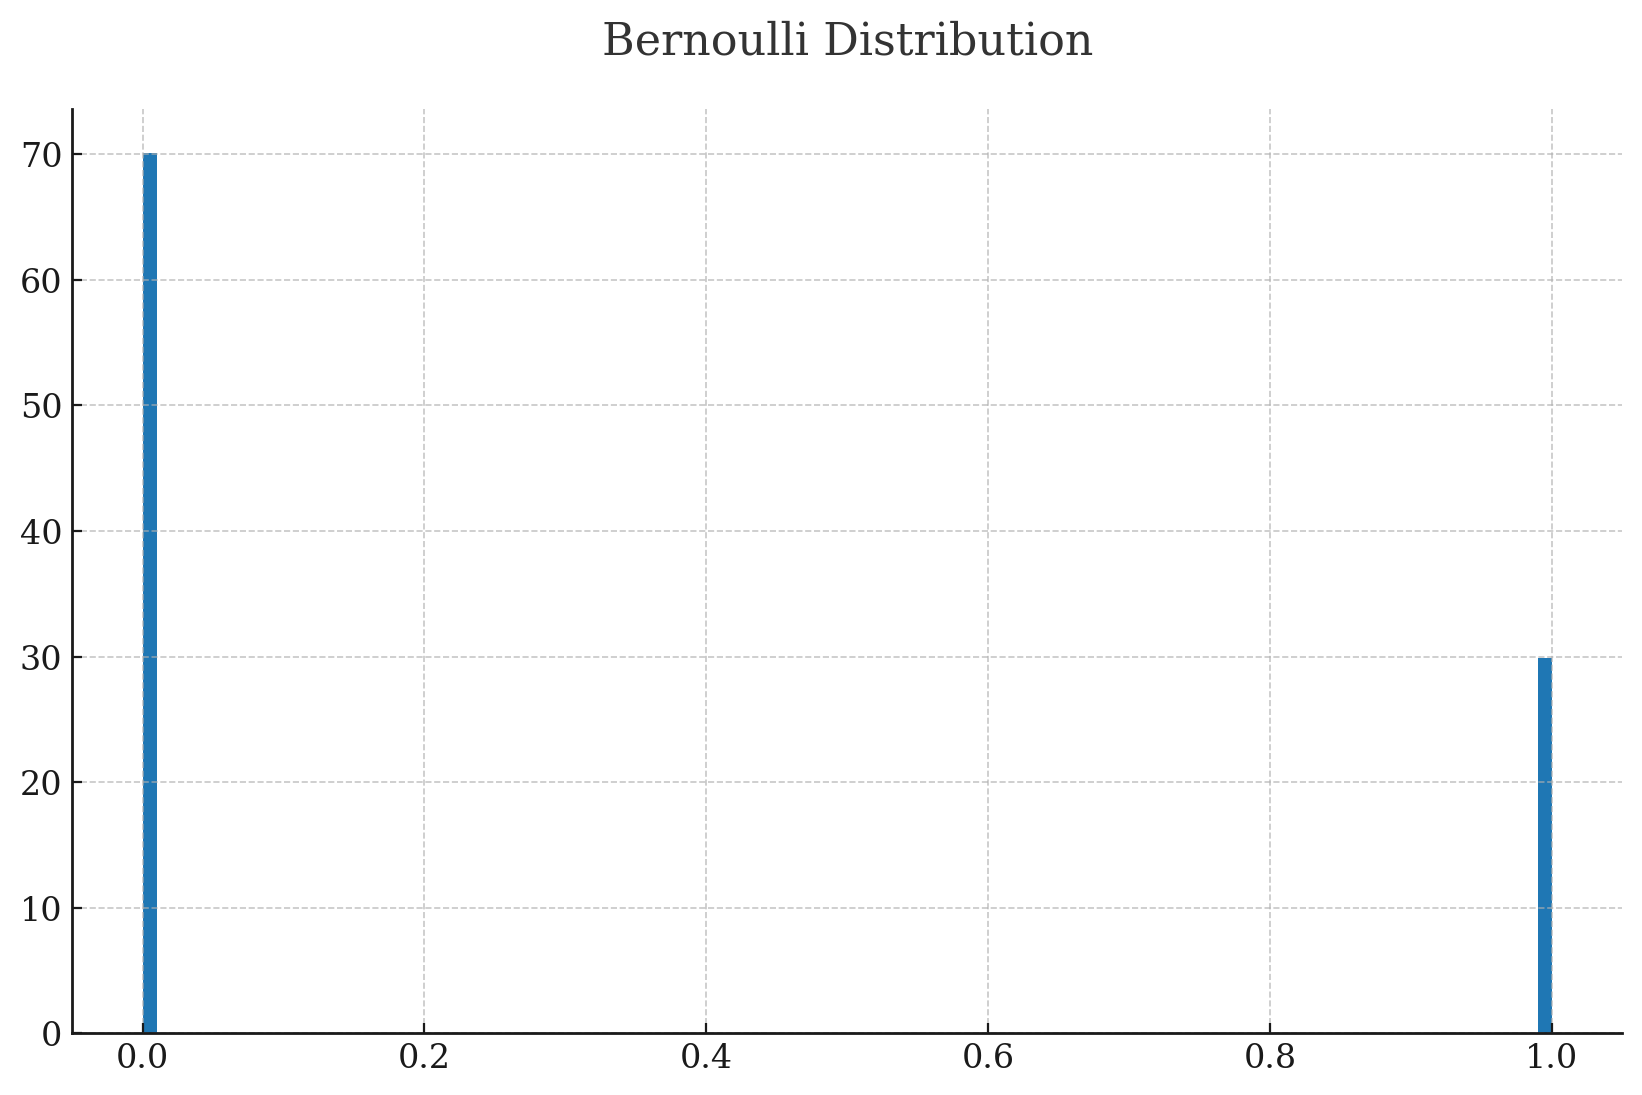

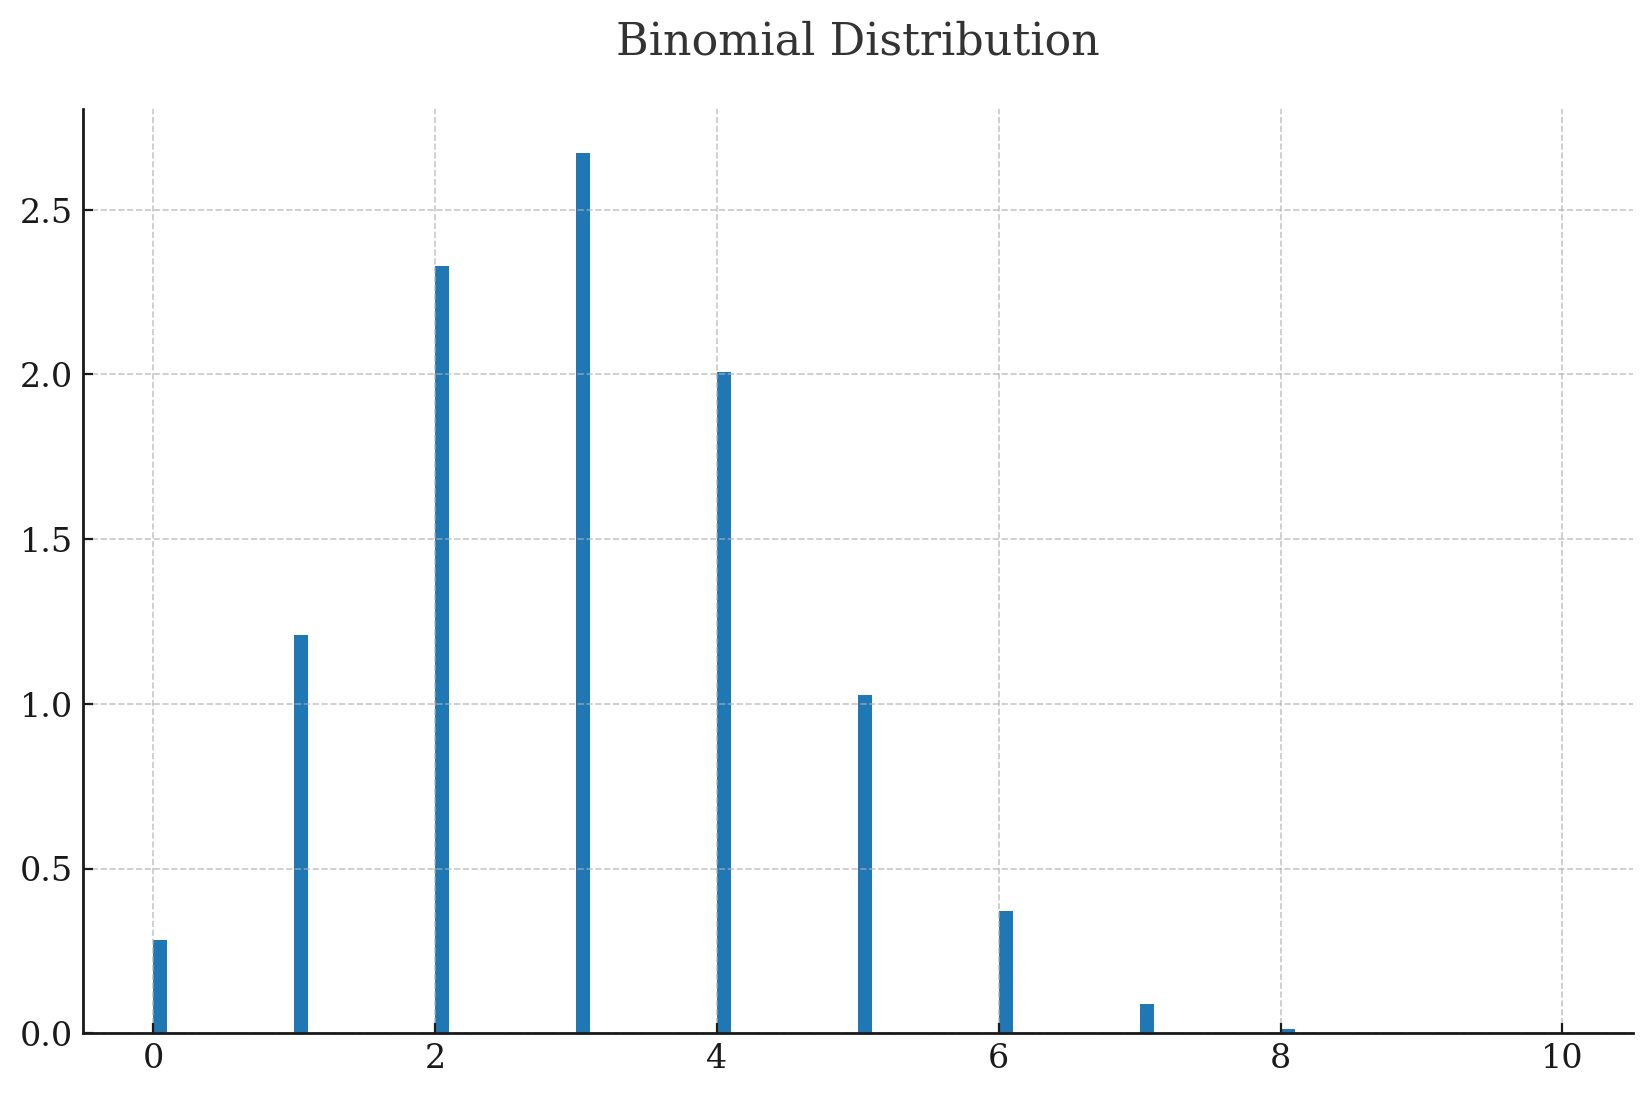

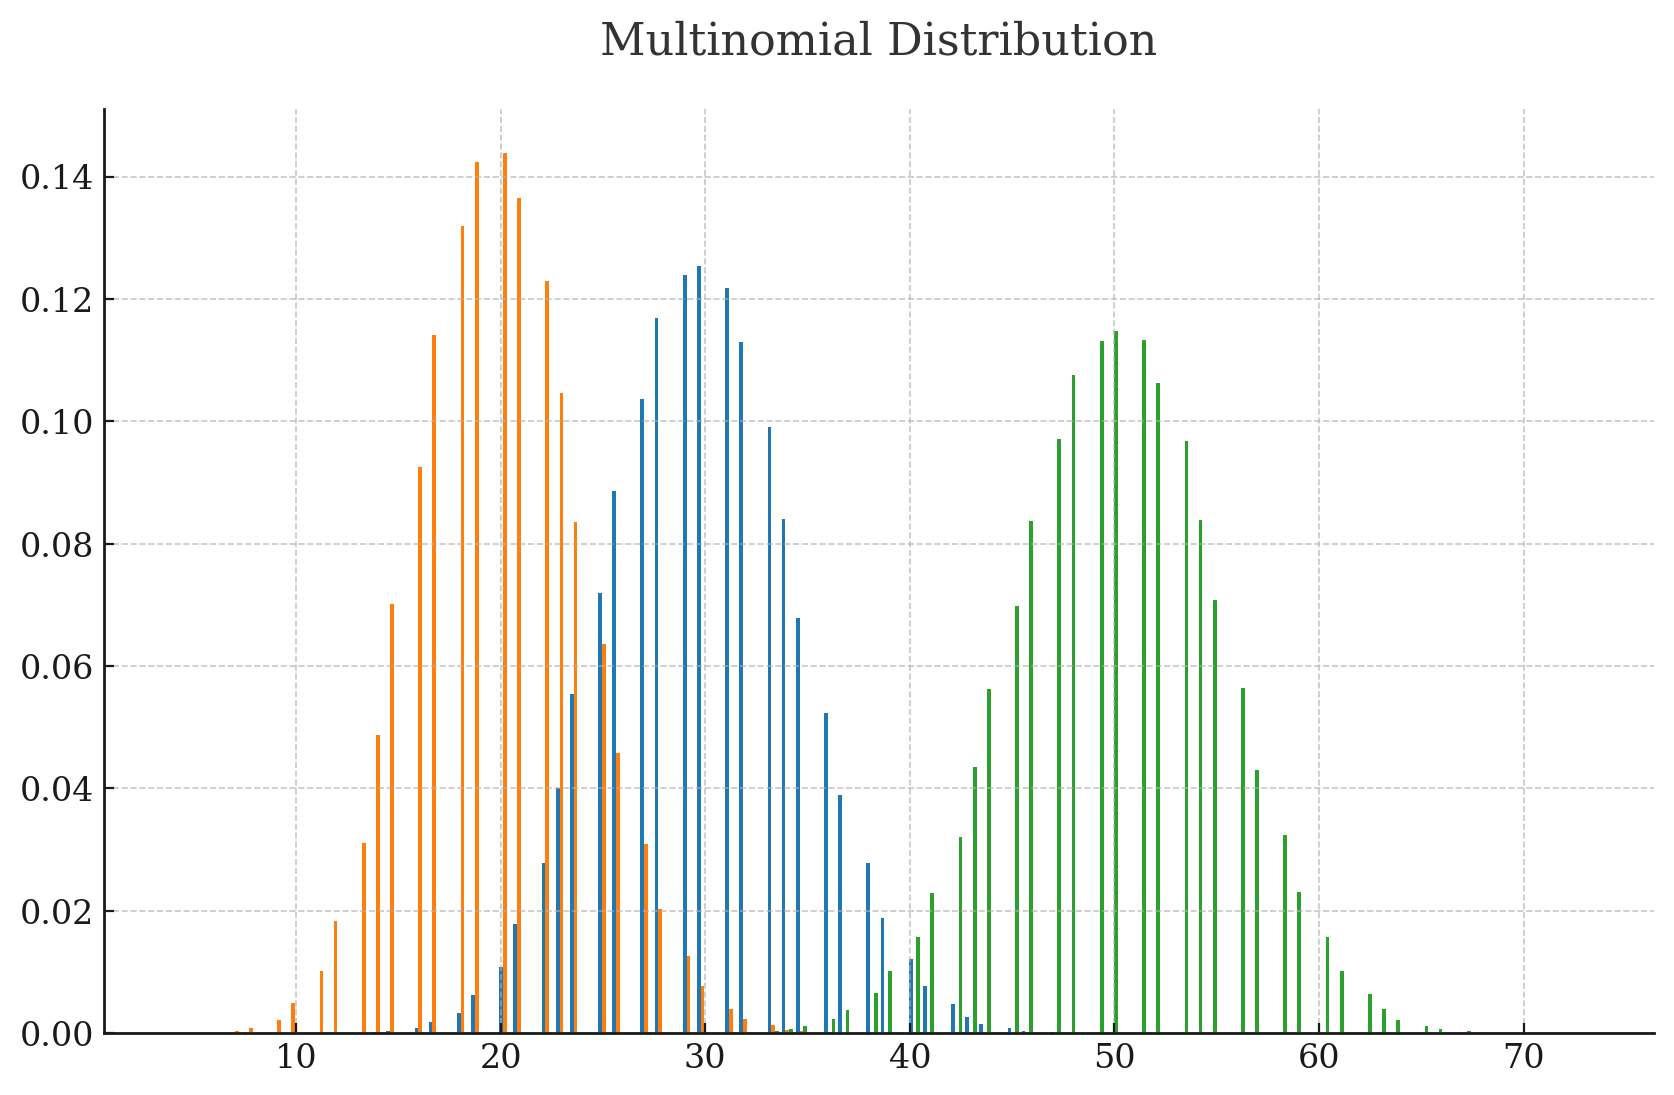

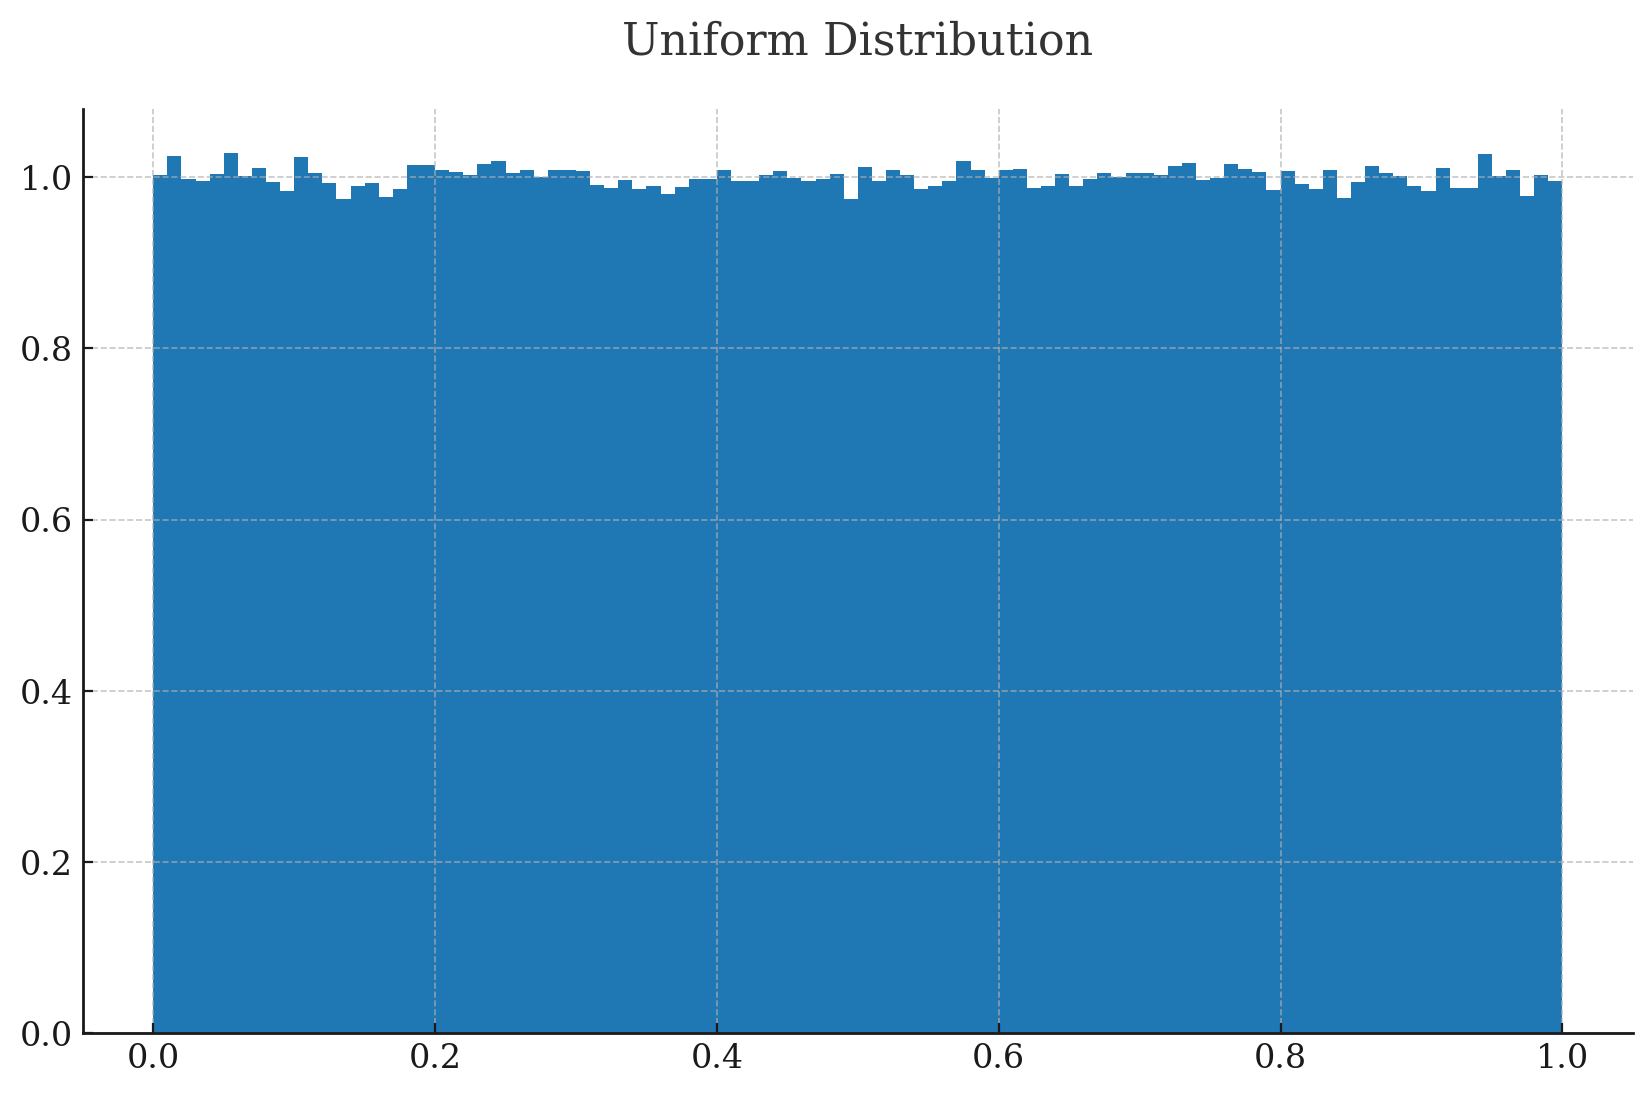

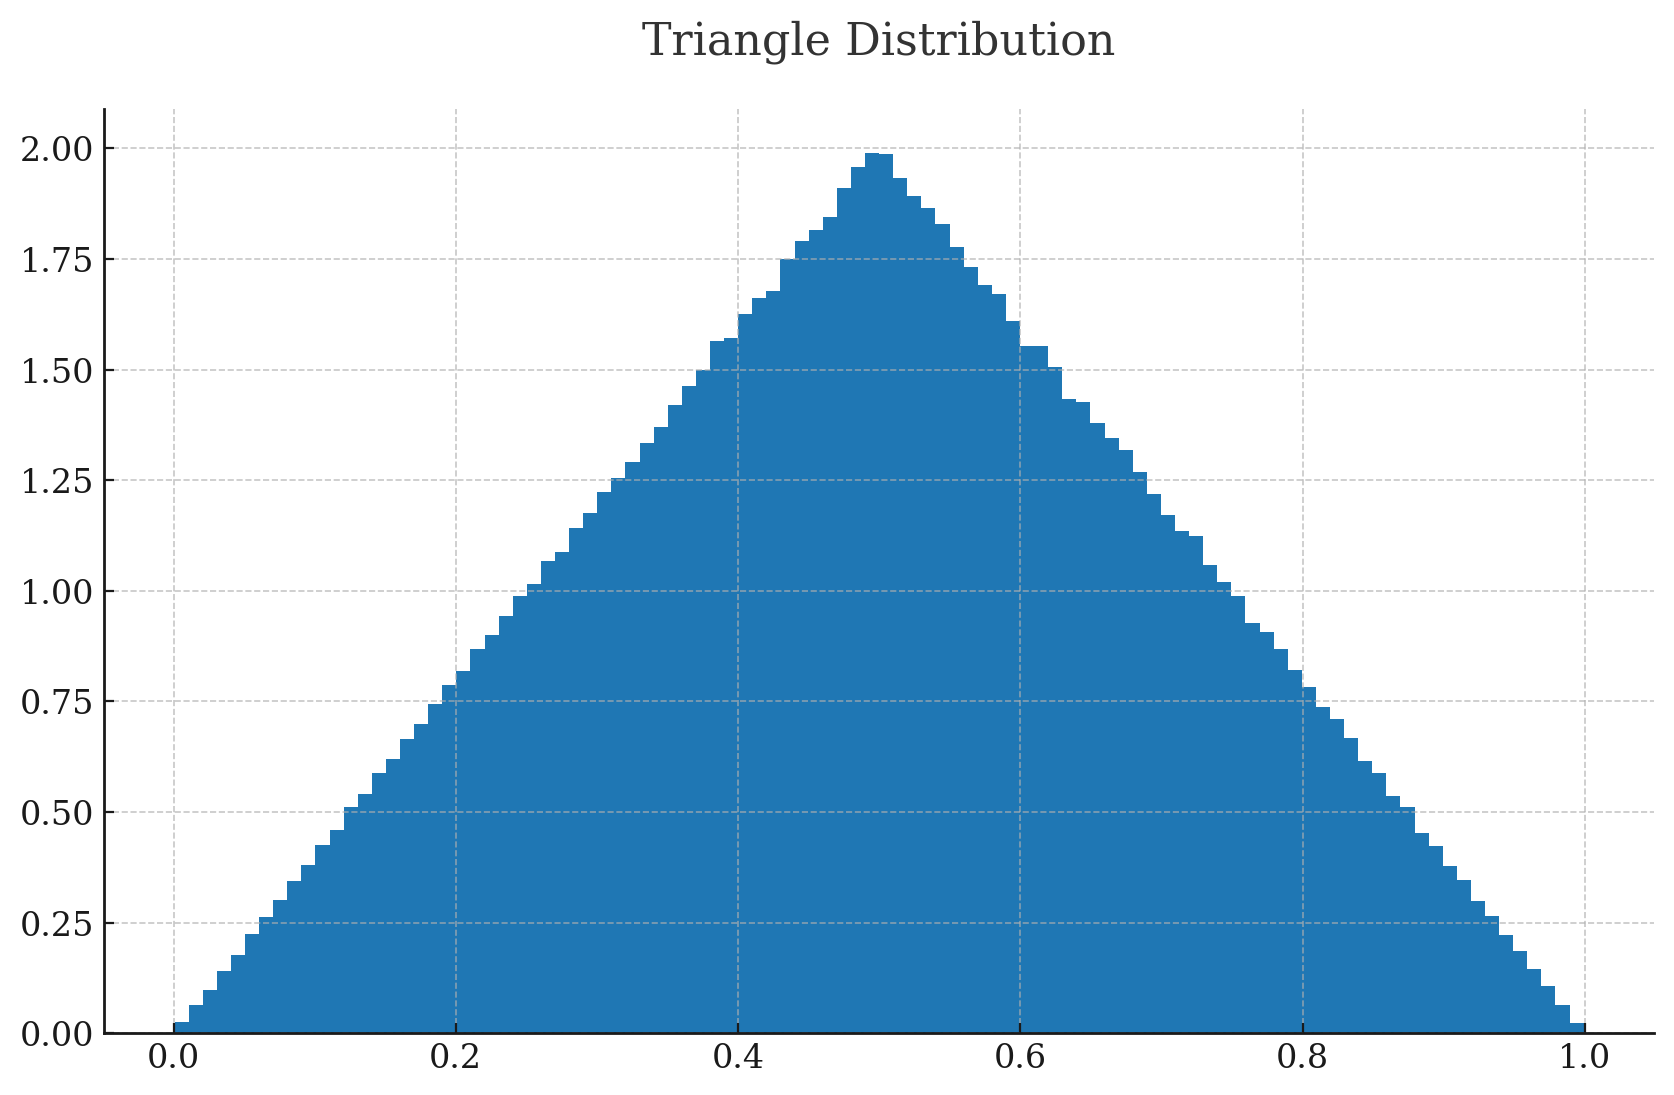

In [4]:
def plot_distribution(sample_function, sample_size=1000000, title=""):
    s = sample_function(sample_size)

    plt.hist(s, bins=100, density=True)
    plt.title(title)
    plt.show()

plot_distribution(sample_normal, title="Normal Distribution")
plot_distribution(sample_bernoulli, title="Bernoulli Distribution")
plot_distribution(sample_binomial, title="Binomial Distribution")
plot_distribution(sample_multinomial, title="Multinomial Distribution")
plot_distribution(sample_uniform, title="Uniform Distribution")
plot_distribution(sample_triangle, title="Triangle Distribution")


# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

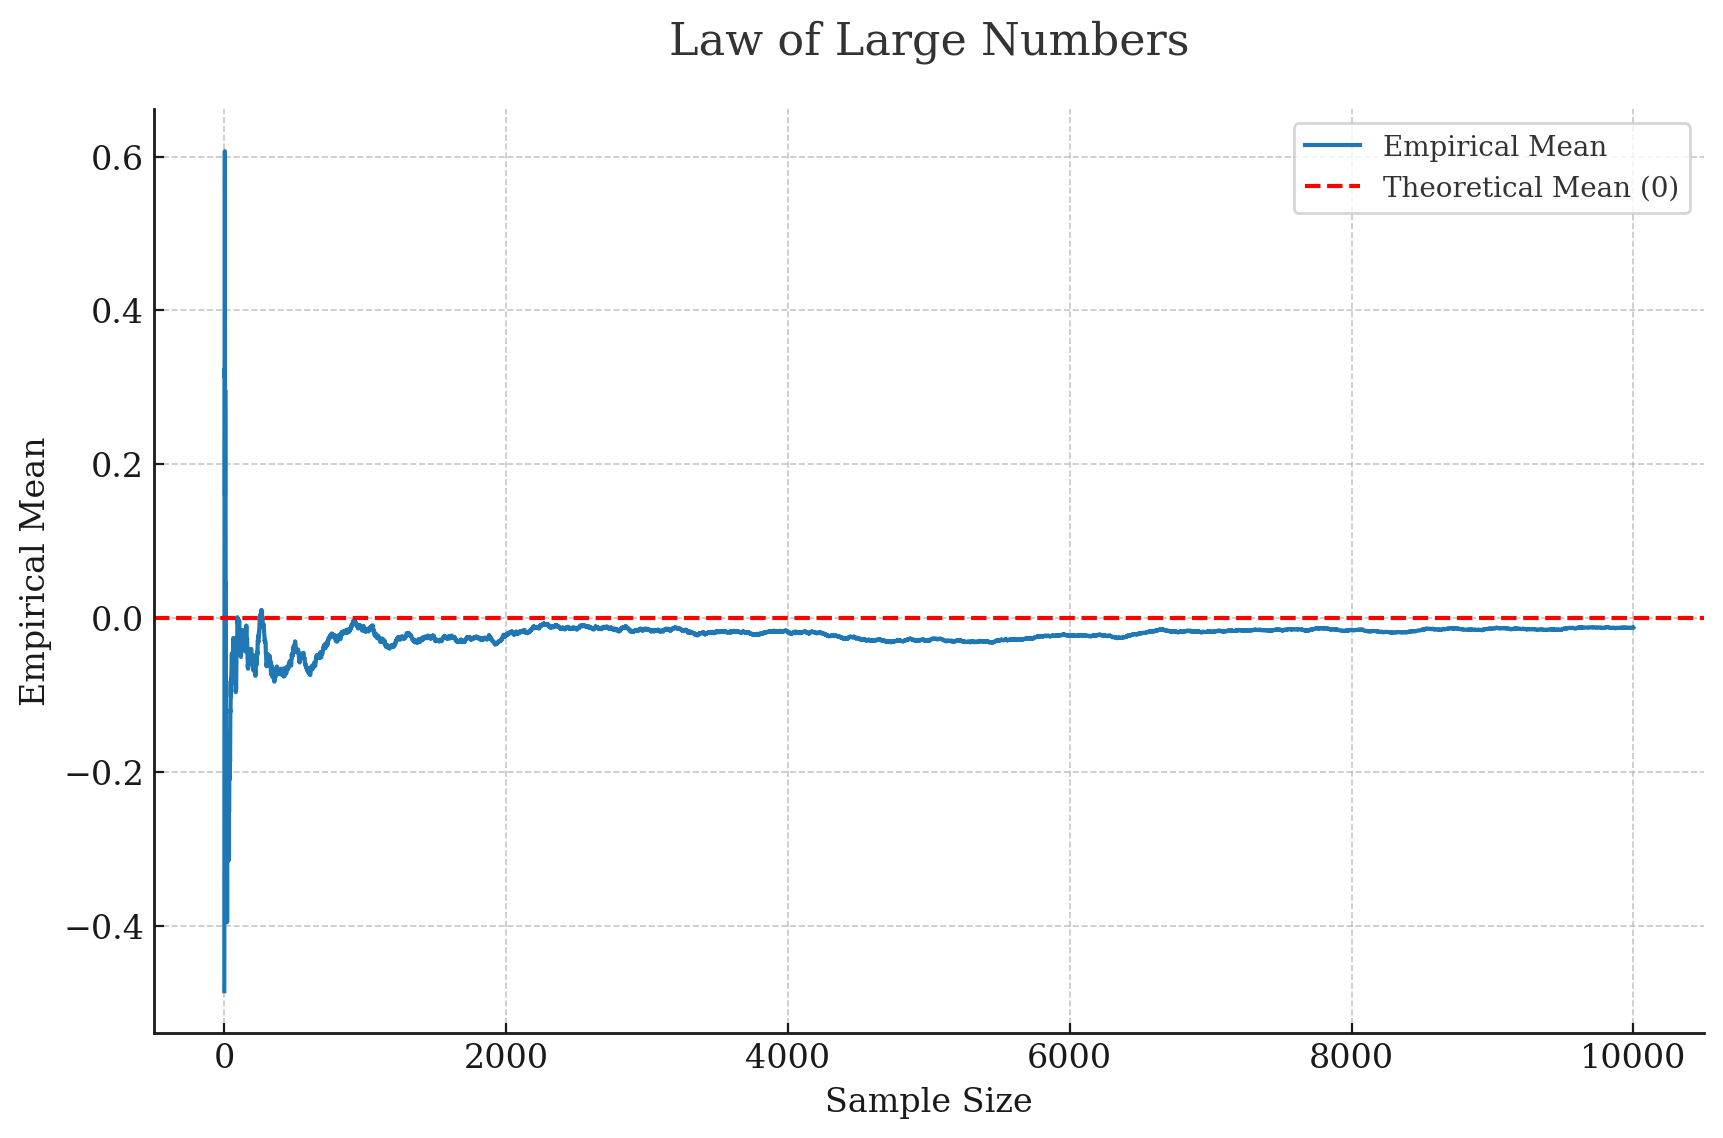

In [37]:
def plot_law_of_large_numbers():

    sample_size = 10000
    samples = sample_normal(sample_size=sample_size)

    empirical_means = [np.mean(samples[:i]) for i in range(1, sample_size + 1)]

    plt.plot(range(1, sample_size + 1), empirical_means, label='Empirical Mean')
    plt.axhline(y=0, color='r', linestyle='--', label='Theoretical Mean (0)')
    plt.title("Law of Large Numbers")
    plt.xlabel("Sample Size")
    plt.ylabel("Empirical Mean")
    plt.legend()
    plt.show()

plot_law_of_large_numbers()

**Answer**:

เมื่อ sample size เพิ่มขึ้น empirical mean จะยิ่งเข้าใกล้/มีค่าใกล้เคียงกับ theoretical mean (=0 สำหรับ N(0,1)) มากขึ้น

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

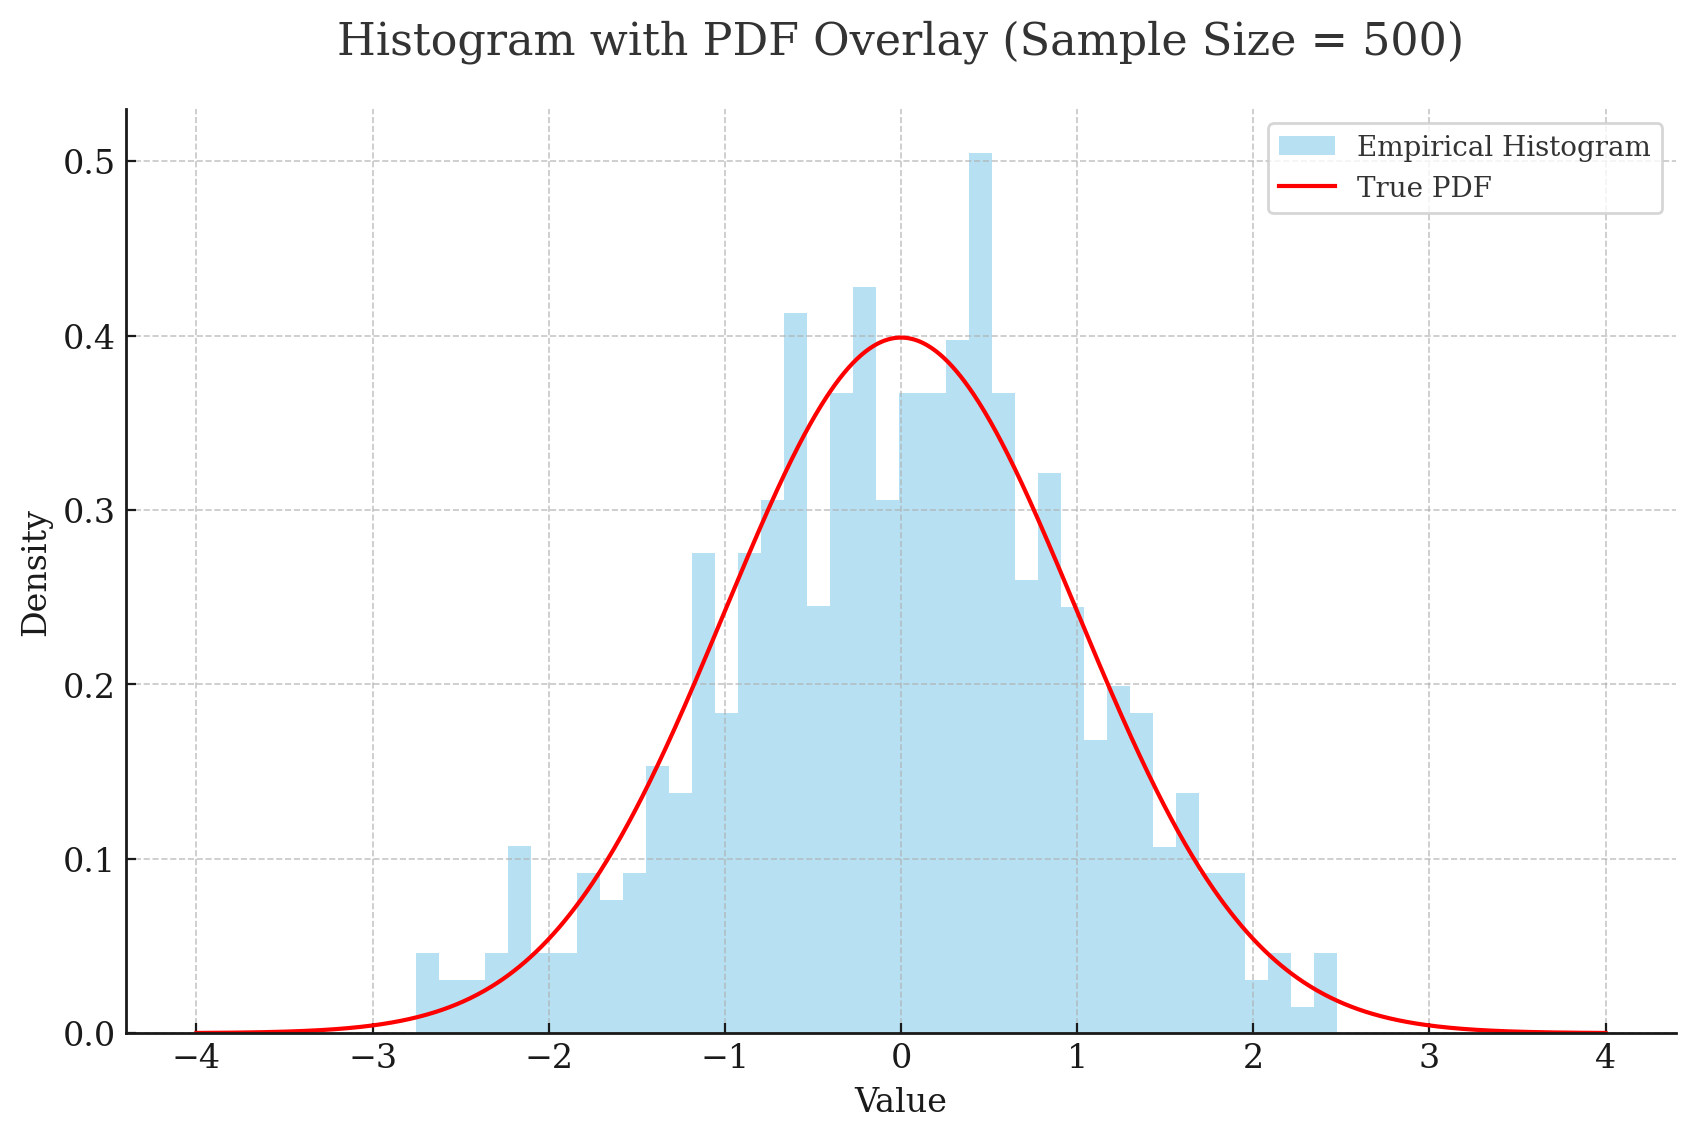

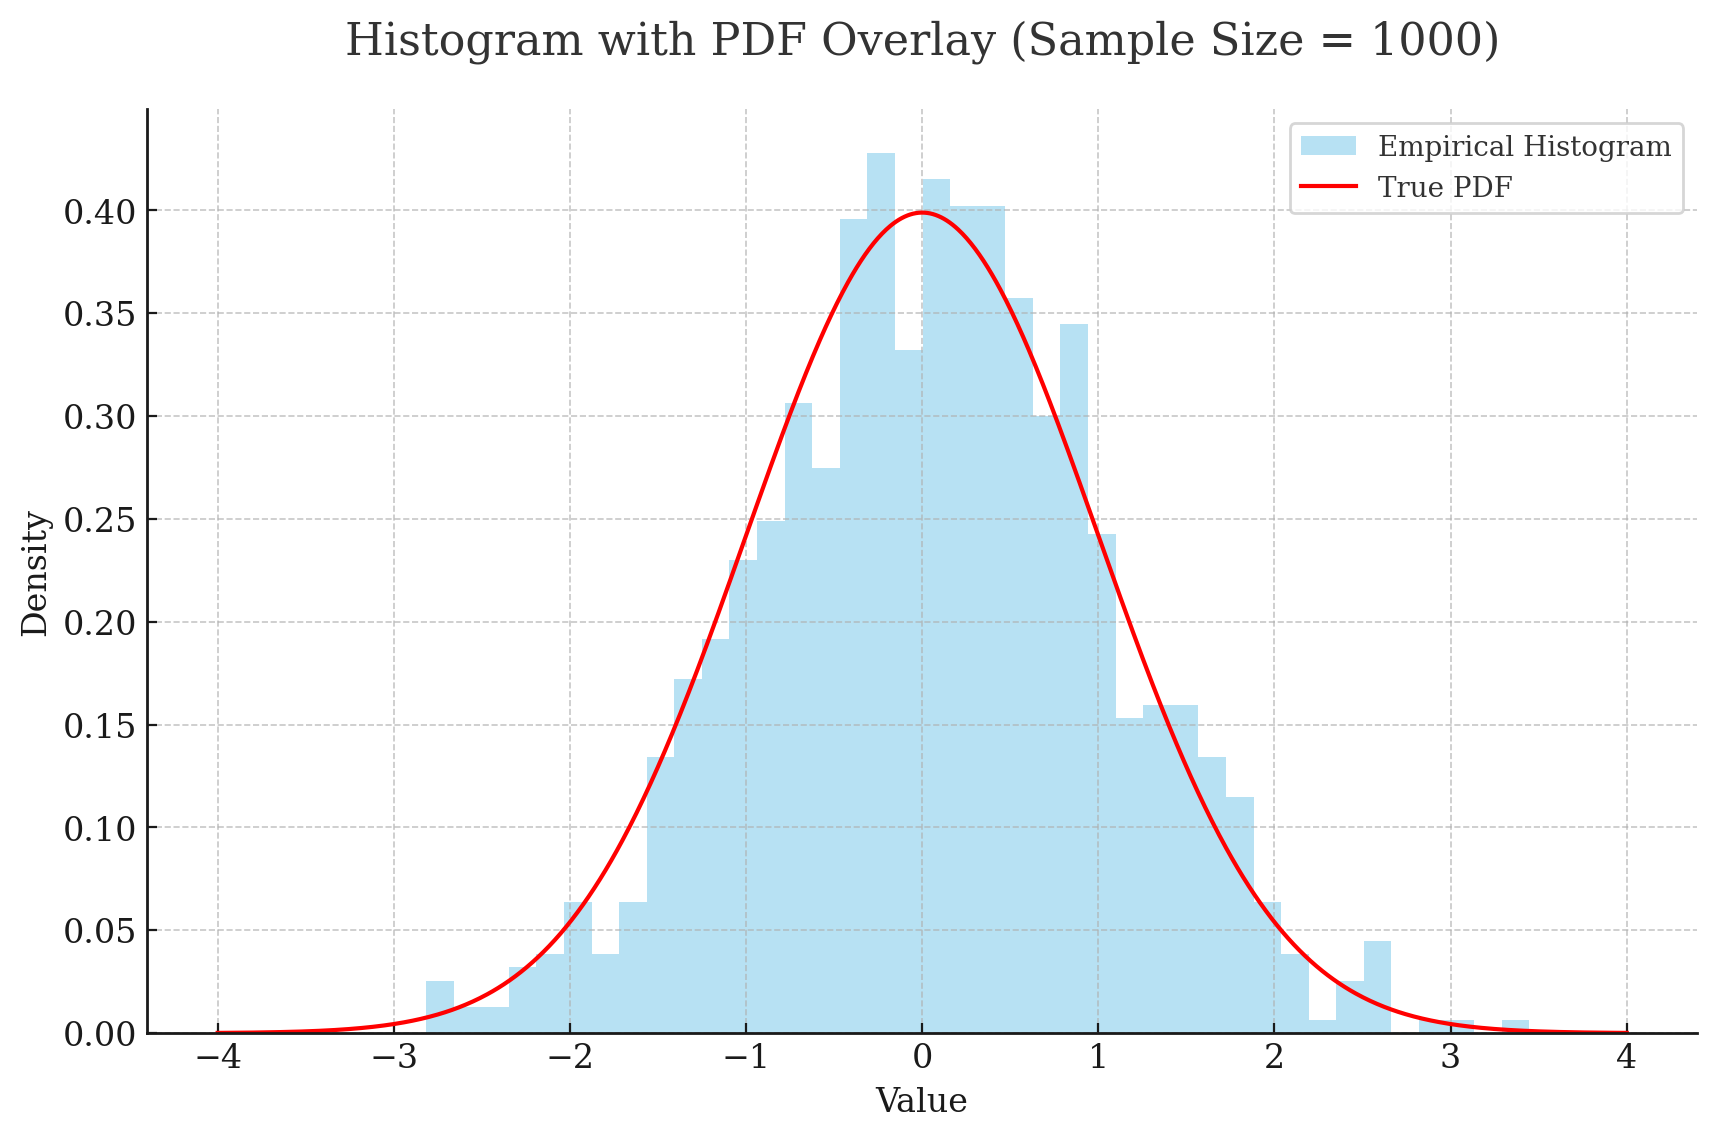

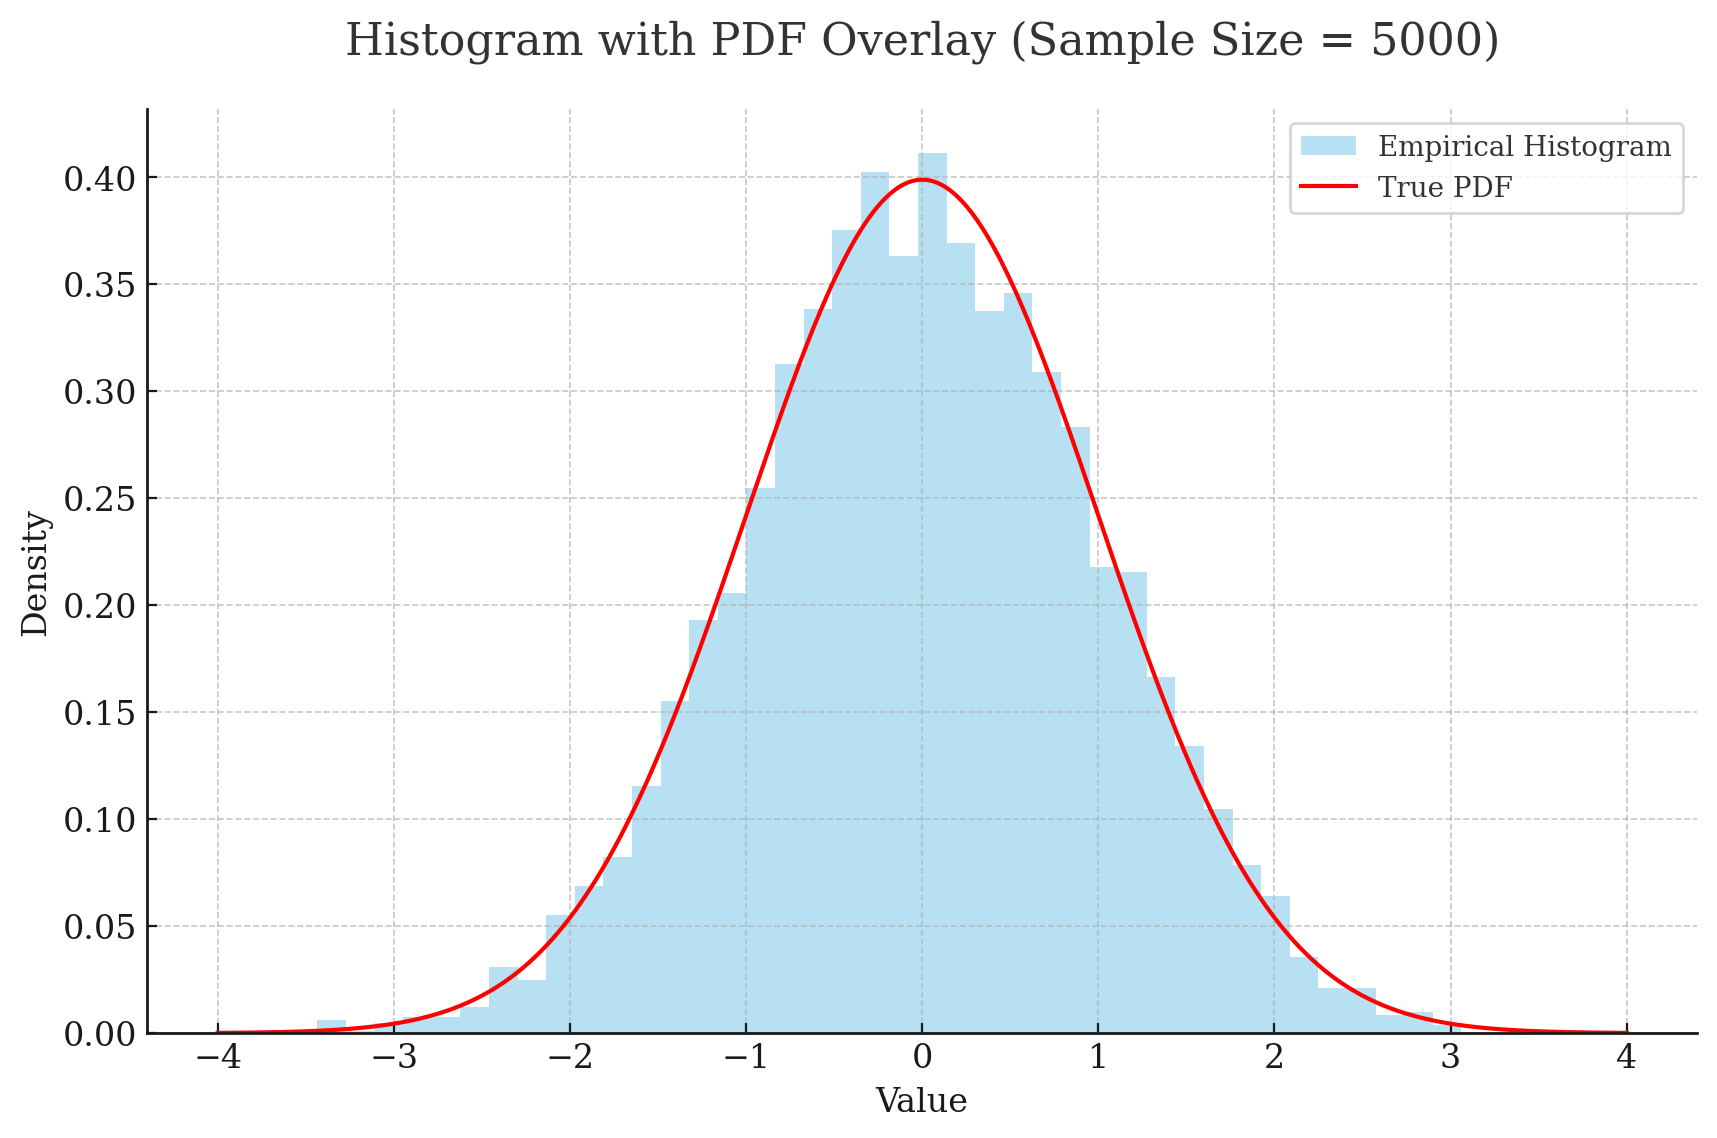

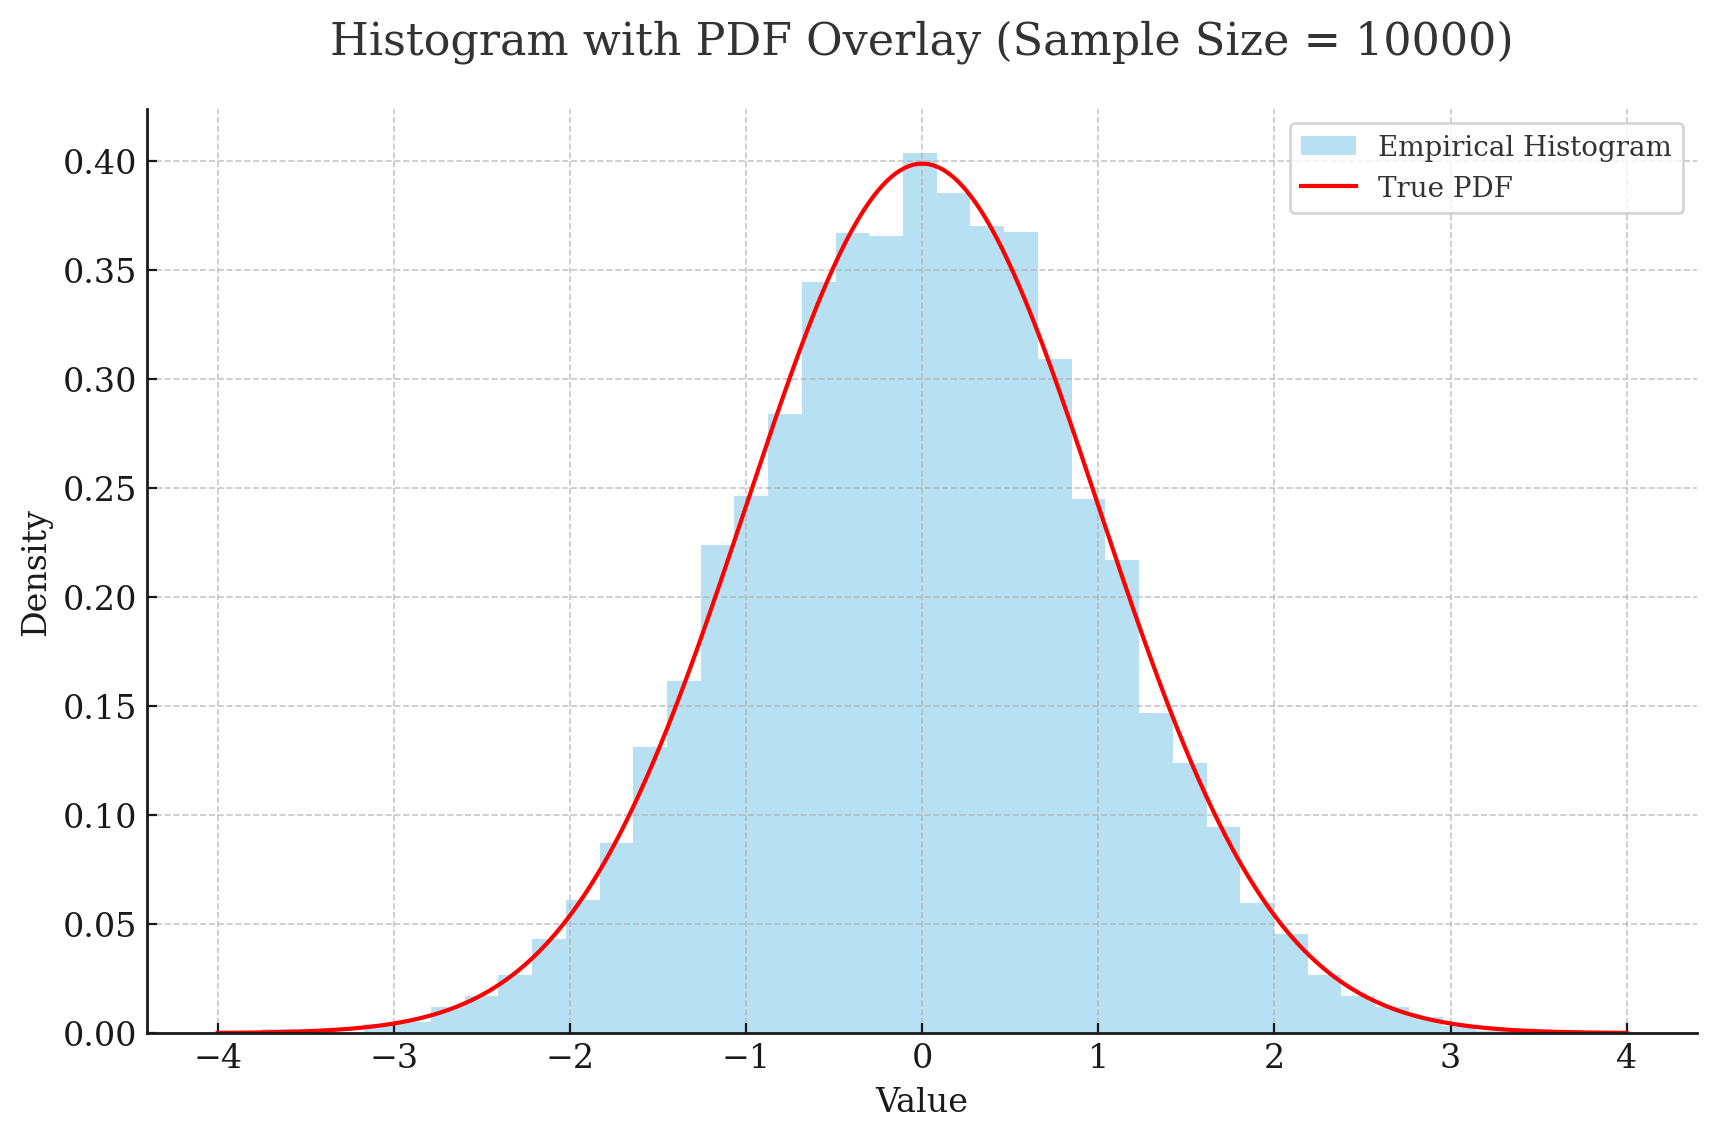

In [6]:
def plot_histogram_with_pdf(sample_size, bins=40):

    samples = sample_normal(sample_size=sample_size, mu=0, std=1)

    # Empirical
    plt.hist(samples, bins=bins, density=True, alpha=0.6, color='skyblue', label='Empirical Histogram')

    # True
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x, 0, 1), color='red', label='True PDF')

    plt.title(f'Histogram with PDF Overlay (Sample Size = {sample_size})')
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


plot_histogram_with_pdf(sample_size=500)
plot_histogram_with_pdf(sample_size=1000)
plot_histogram_with_pdf(sample_size=5000)
plot_histogram_with_pdf(sample_size=10000)


**Answer**:

ยิ่ง sample size มากขึ้น histogram จะยิ่งเข้าใกล้/หน้าตาเหมือนกับ true PDF มากขึ้น เช่นใน sample size ที่เล็กที่สุด(=500) อาจจะยังมีบาง bin ที่ไม่ใกล้เคียงกับ true PDF อาจจะสูงกว่าหรือต่ำกว่าบ้าง แต่เมื่อเพิ่ม sample size ขึ้นไปจะเห็นว่ามี bin ที่โดดออกไปจาก true PDF น้อยลง

และจะสังเกตได้อีกว่า ถึงแม้จะเพิ่ม sample size ขึ้นไป แต่ empirical mean ของแต่ละ histogram ก็ยังคงมีค่าใกล้เคียงกับ theoretical mean(=0 สำหรับ $\mathcal{N}(0,1)$) อยู่ ซึ่งเป็นไปตาม Law of large number

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

Bi-Mean: 30.0, Empirical-Mean: 30.0178
Bi-Std: 4.58257569495584, Empirical-Std: 4.590651714081564


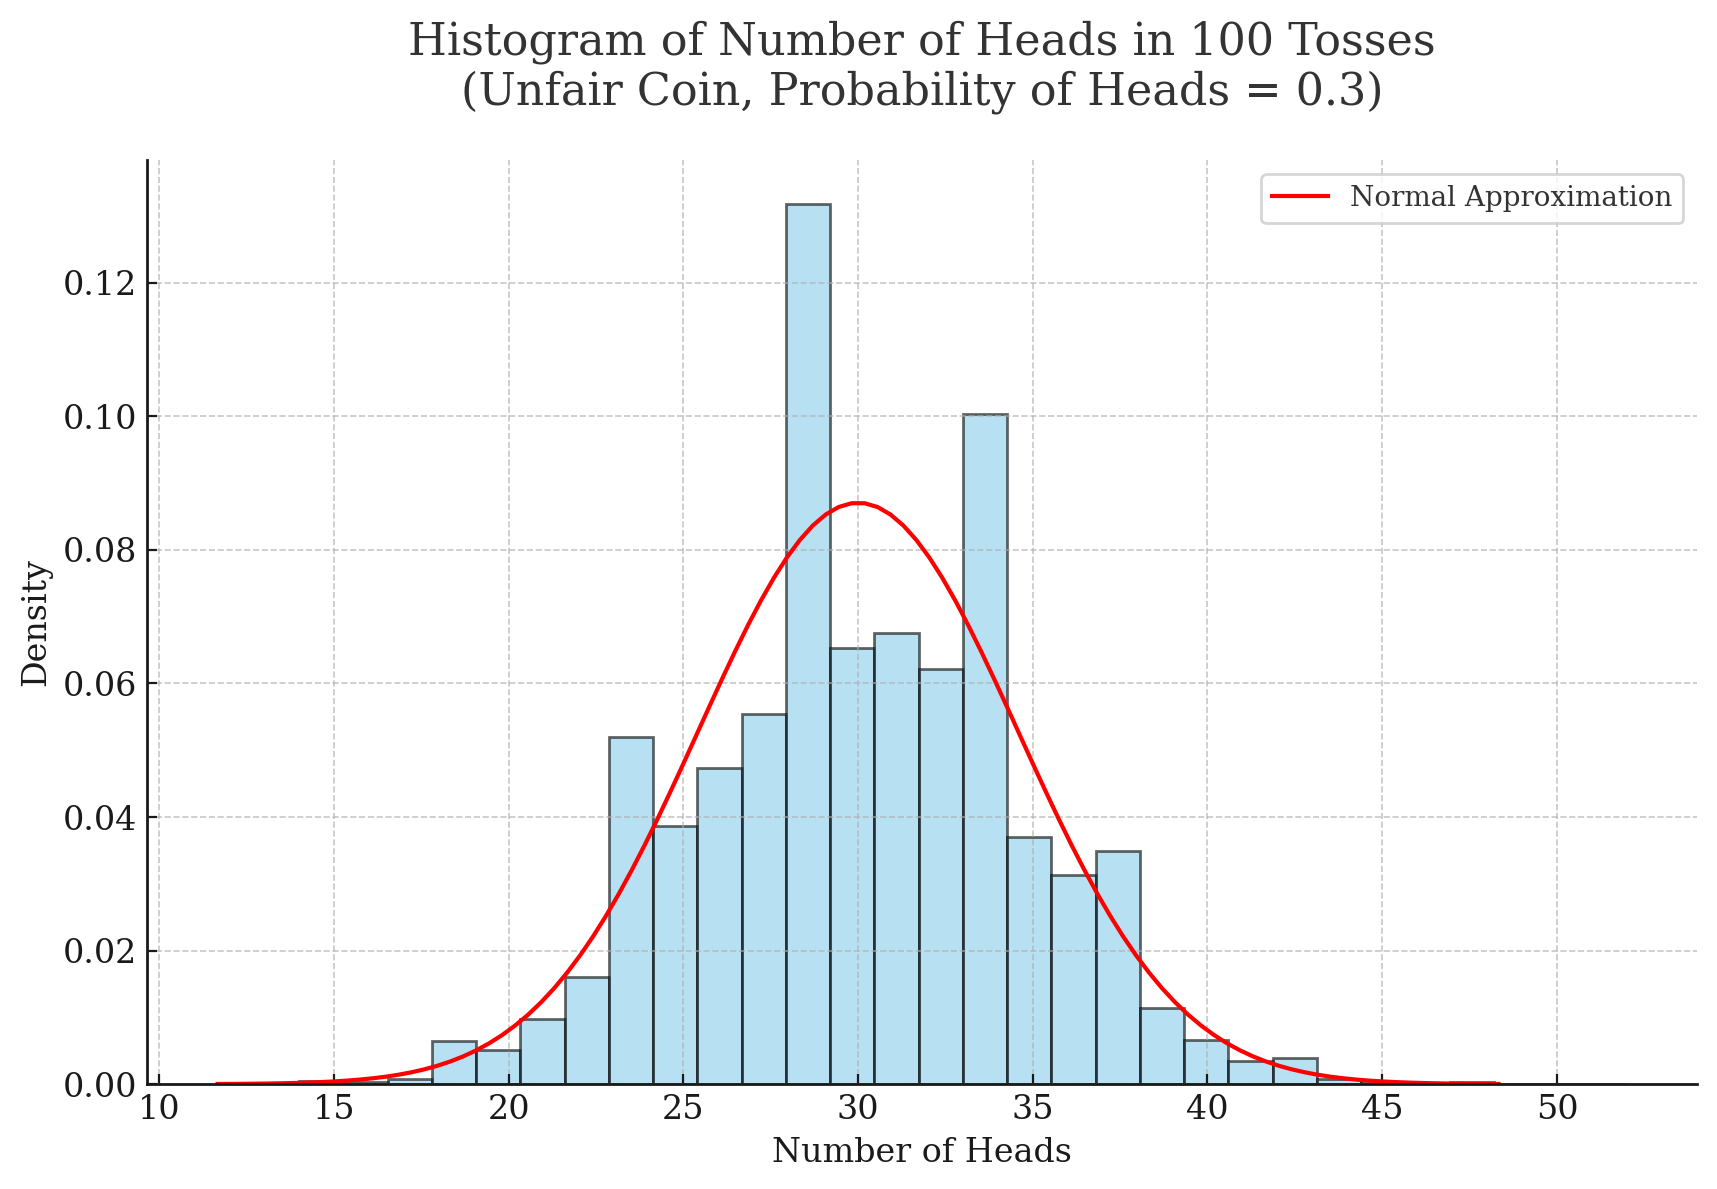

In [7]:
def simulate_coin_tosses(n_simulations=10000, n_tosses=100, p=0.3):

    # Simulate the simulations
    results = np.random.binomial(n_tosses, p, size=n_simulations)
    plt.hist(results, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

    # True probability of binomial distribution
    mean = n_tosses * p
    # print(mean, np.mean(results))
    print(f"Bi-Mean: {mean}, Empirical-Mean: {np.mean(results)}")
    std = np.sqrt(n_tosses * p * (1 - p))
    print(f"Bi-Std: {std}, Empirical-Std: {np.std(results)}")
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    plt.plot(x, norm.pdf(x, mean, std), color='red', label='Normal Approximation')

    # Plot
    plt.title(f"Histogram of Number of Heads in {n_tosses} Tosses\n(Unfair Coin, Probability of Heads = {p})")
    plt.xlabel("Number of Heads")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Run the simulation
simulate_coin_tosses()


**Answer**:

Yes, its looks like a normal distribution ( $\mathcal{N}(30, \sim4.58)$ ). 
ถึงแม้ว่าอาจจะมีบาง bin ที่ยังคาดเคลื่อนไปบ้าง แต่หากเพิ่มจำนวนการทดลองมากขึ้น ผลลัพธ์ที่ได้ก็จะใกล้เคียงกับ normal distribution มากยิ่งขึ้น

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

In [8]:
def probability_clt(n=100, p=0.3, threshold=40, plot_cdf=False):

    # Binomial distribution
    mean = n * p
    std = np.sqrt(n * p * (1 - p))
    z_score = (threshold - mean) / std
    print(f"Mean: {mean}, Std: {std}, X: {threshold}, Z: {z_score}")

    probability = 1 - norm.cdf(z_score)

    # # plot CDF
    # if plot_cdf:
    #     x = np.linspace(0, n, n+1)
    #     plt.plot(x, binom.cdf(x, n, p), label='Binomial CDF')
    #     plt.axvline(x=threshold, color='grey', linestyle='--', label='Threshold')
    #     plt.scatter(x=threshold, y=norm.cdf(z_score), color='red')
    #     plt.title("CDF of Binomial Distribution (n=100, p=0.3)")
    #     plt.xlabel("Number of Heads")
    #     plt.ylabel("Cumulative Probability")
    #     plt.legend()
    #     plt.show()

    return probability


probability = probability_clt()
print(f"The probability of getting more than 40 heads: {probability:.4f}")


Mean: 30.0, Std: 4.58257569495584, X: 40, Z: 2.182178902359924
The probability of getting more than 40 heads: 0.0145


**Answer**:

The probability of getting more than 40 heads $= 0.0145$


**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [9]:
def probability_binomial(n=100, p=0.3, threshold=40):

    probability = 1 - binom.cdf(threshold, n, p)

    return probability

prob_clt = probability_clt()
prob_binomial = probability_binomial()

difference = abs(prob_clt - prob_binomial)

print(f"CLT Approximation Probability: {prob_clt}")
print(f"Binomial Distribution Probability: {prob_binomial}")
print(f"Difference: {difference}")


Mean: 30.0, Std: 4.58257569495584, X: 40, Z: 2.182178902359924
CLT Approximation Probability: 0.014548165870626129
Binomial Distribution Probability: 0.012498407166438241
Difference: 0.0020497587041878873


**Answer**:

- CLT Probability $= 0.0145$
- Binomial Probability $= 0.0125$
- Difference $= 0.0020$

# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

![image](Q7.jpg)

In [10]:
from scipy.integrate import quad

def f_X(x):
    if -2 <= x <= 0:
        return 0.1
    elif 0 < x <= 2:
        return 0.4
    else:
        return 0

def f_Y(y):
    if 3 <= y <= 5:
        return 0.5  # Uniform(3,5) -> 1/(5-3) = 0.5
    else:
        return 0


def f_Z(z):
    # Convolution of f_X and f_Y
    # Integrate f_X(x) * f_Y(z - x) over [-2, 2]
    return quad(lambda x: f_X(x) * f_Y(z - x), -2, 2)[0]

# P(3 < Z < 5) = integrate f_Z over (3, 5)
probability, _ = quad(f_Z, 3, 5)

print(f"The probability P(3 < Z < 5) = {probability:.4f}")


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_9847/791121362.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(lambda x: f_X(x) * f_Y(z - x), -2, 2)[0]


The probability P(3 < Z < 5) = 0.5000


/var/folders/m6/fz_qjnl51s70hy69d_st2z240000gn/T/ipykernel_9847/791121362.py:24: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  probability, _ = quad(f_Z, 3, 5)


**Answer**:

$P( 3 < Z < 5 ) = 0.5$.

# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$

In [11]:
num_samples = 10000

# Generate X samples from U(-1, 1)
X = np.random.uniform(-1, 1, num_samples)

# Case 1: A = 10 (constant)
A1 = np.full(num_samples, 10)
Y1 = X + A1
correlation_1 = np.corrcoef(X, Y1)[0, 1]

# Case 2: A ~ U(-1, 1)
A2 = np.random.uniform(-1, 1, num_samples)
Y2 = X + A2
correlation_2 = np.corrcoef(X, Y2)[0, 1]

# Case 3: A ~ U(-10, 10)
A3 = np.random.uniform(-10, 10, num_samples)
Y3 = X + A3
correlation_3 = np.corrcoef(X, Y3)[0, 1]

# Case 4: A ~ U(-100, 100)
A4 = np.random.uniform(-100, 100, num_samples)
Y4 = X + A4
correlation_4 = np.corrcoef(X, Y4)[0, 1]

# Display the correlations
print(f"Correlation of X and Y (A = 10): {correlation_1:.4f}")
print(f"Correlation of X and Y (A ~ U(-1, 1)): {correlation_2:.4f}")
print(f"Correlation of X and Y (A ~ U(-10, 10)): {correlation_3:.4f}")
print(f"Correlation of X and Y (A ~ U(-100, 100)): {correlation_4:.4f}")


Correlation of X and Y (A = 10): 1.0000
Correlation of X and Y (A ~ U(-1, 1)): 0.7143
Correlation of X and Y (A ~ U(-10, 10)): 0.0967
Correlation of X and Y (A ~ U(-100, 100)): 0.0291


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?

$$\rho_{X,Y} = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

$\therefore$
yes, the correlation decrease as we increase the randomness of A, because the covariance between X and Y will be more spread out as A is more random. And standard deviation of Y will be larger as A is more random. Therefore, the correlation will be smaller.


2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

In [12]:
X = np.random.uniform(-1, 1, num_samples)

# Case 1: A ~ U(-10, 10)
A1 = np.random.uniform(-10, 10, num_samples)
Y1 = X + A1
correlation_1 = np.corrcoef(X, Y1)[0, 1]
print(f"Correlation of X and Y when A ~ U(-10, 10): {correlation_1:.4f}")

# Case 2: A ~ U(9090, 10010) (equivalent to A1 + 10000)
A2 = A1 + 10000
Y2 = X + A2
correlation_2 = np.corrcoef(X, Y2)[0, 1]
print(f"Correlation of X and Y when A ~ U(9090, 10010): {correlation_2:.4f}")

Correlation of X and Y when A ~ U(-10, 10): 0.0988
Correlation of X and Y when A ~ U(9090, 10010): 0.0988


The correlation between X and Y=X+A does not change, because it just shift A.
Thus, the correlation primarily depends on the spread (variance) of A rather than its absolute value or offset.

# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

**Solution**:

1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.

We will set the temperature $\mu$ that minimize the Expected Probability of Failure.

$$
E[P(Fail | t)] = \int_{\mu - 1}^{\mu + 1} P(Fail | t) \cdot f_T(t) \, dt 
$$

where $f_T(t)$ is probability density function (PDF) of $t \sim U(\mu-1,\mu+1)$

$$
f_T(t) = \frac{1}{(\mu+1) - (\mu-1)} = 0.5 \quad ;\ t \in [\mu - 1, \mu + 1]
$$

then

$$
E[P(Fail | t)] = \int_{\mu - 1}^{\mu + 1} \left( \frac{0.97}{2250}(t - 15)^2 + 0.001 \right) \cdot 0.5 \, dt
$$

Find optimal $\mu$ that $\text{Minimize}\ E[P(Fail | t)]$ 

$$
\mu^* = \arg \min_{\mu} \int_{\mu - 1}^{\mu + 1} \left( \frac{0.97}{2250}(t - 15)^2 + 0.001 \right) \cdot 0.5 \, dt
$$

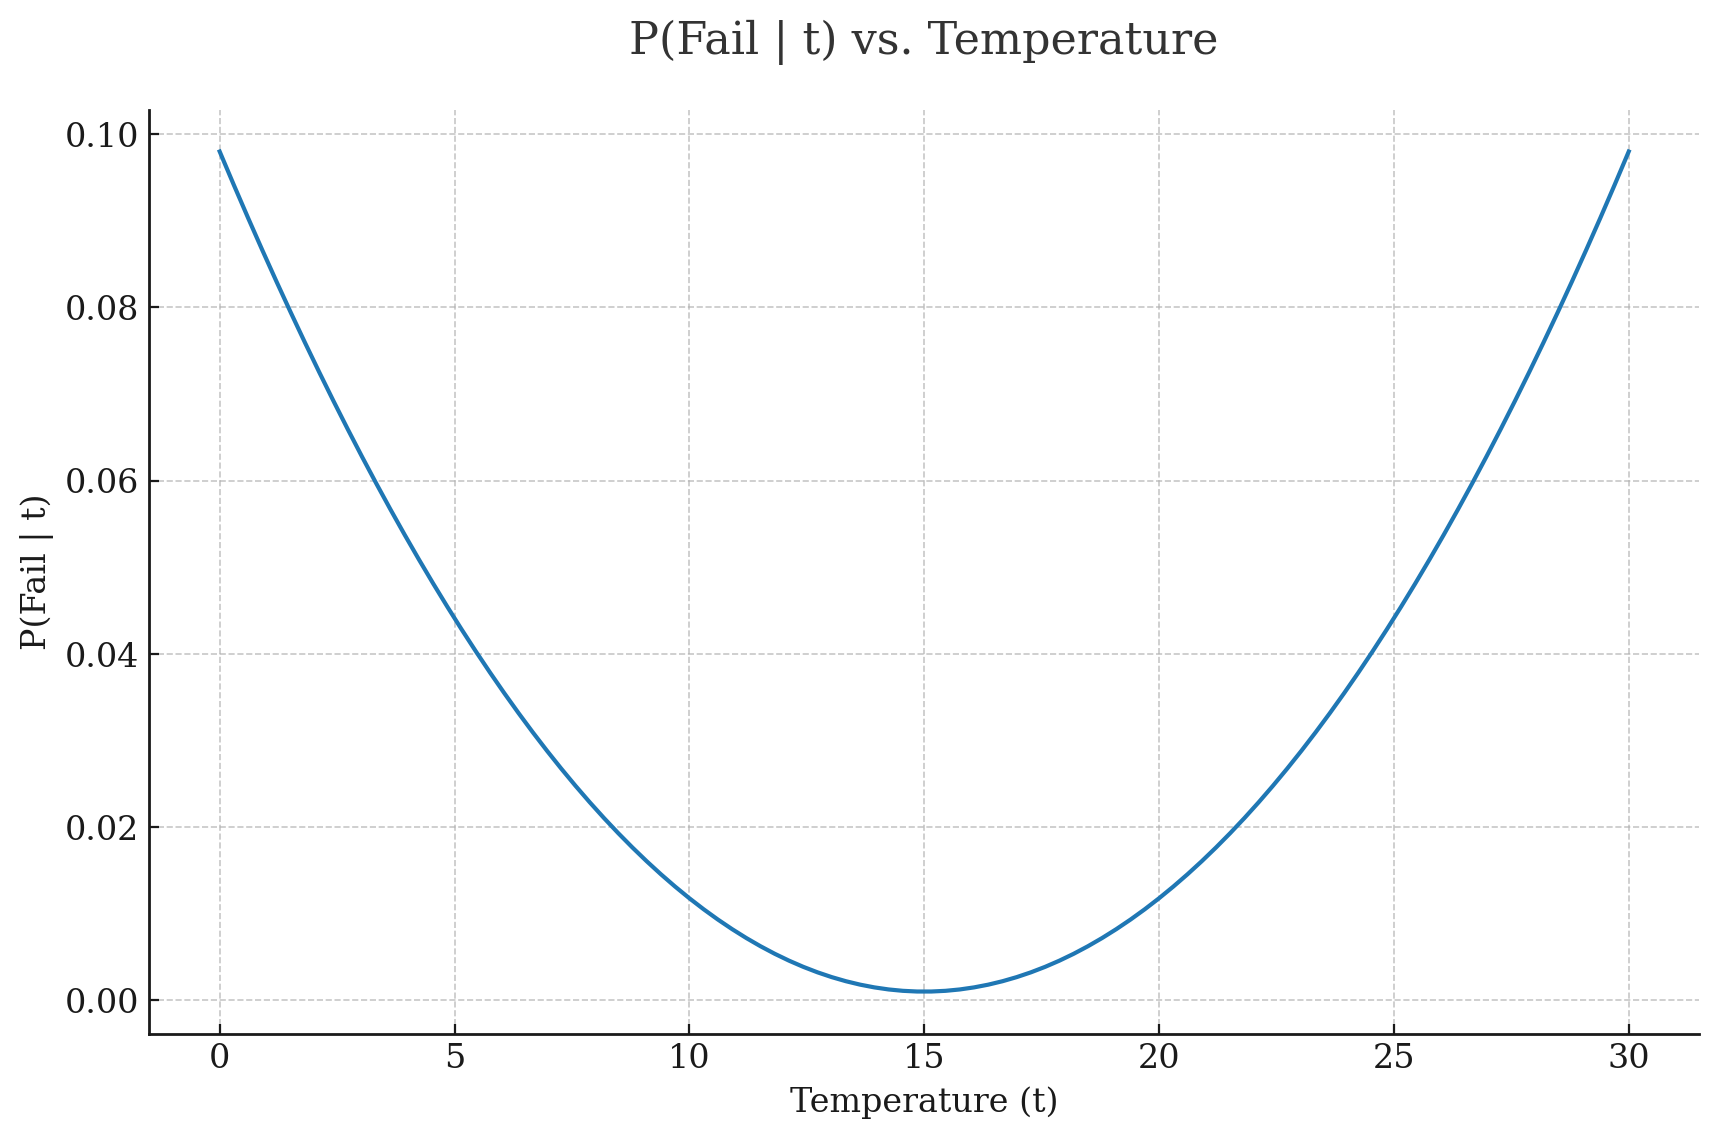

In [13]:
def P_fail_given_t(t):
    return (0.97 / 2250) * (t - 15)**2 + 0.001

def plot_P_fail_given_t():
    t = np.linspace(0, 30, 100)
    P_fail = P_fail_given_t(t)
    plt.plot(t, P_fail, label='P(Fail | t)')
    plt.title("P(Fail | t) vs. Temperature")
    plt.xlabel("Temperature (t)")
    plt.ylabel("P(Fail | t)")
    plt.show()

plot_P_fail_given_t()

In [14]:
from scipy.integrate import quad
from scipy.optimize import minimize_scalar

def E_prob_fail_given_t(mu):
    # Integrate P(Fail | t) * f_T(t) over t in [mu-1, mu+1]
    result, _ = quad(lambda t: P_fail_given_t(t) * 0.5, mu - 1, mu + 1)
    return result

optimal_temp = minimize_scalar(E_prob_fail_given_t, bounds=(0, 30), method='bounded').x
print(f"Optimal temperature setting (mu): {optimal_temp}")

Optimal temperature setting (mu): 15.0


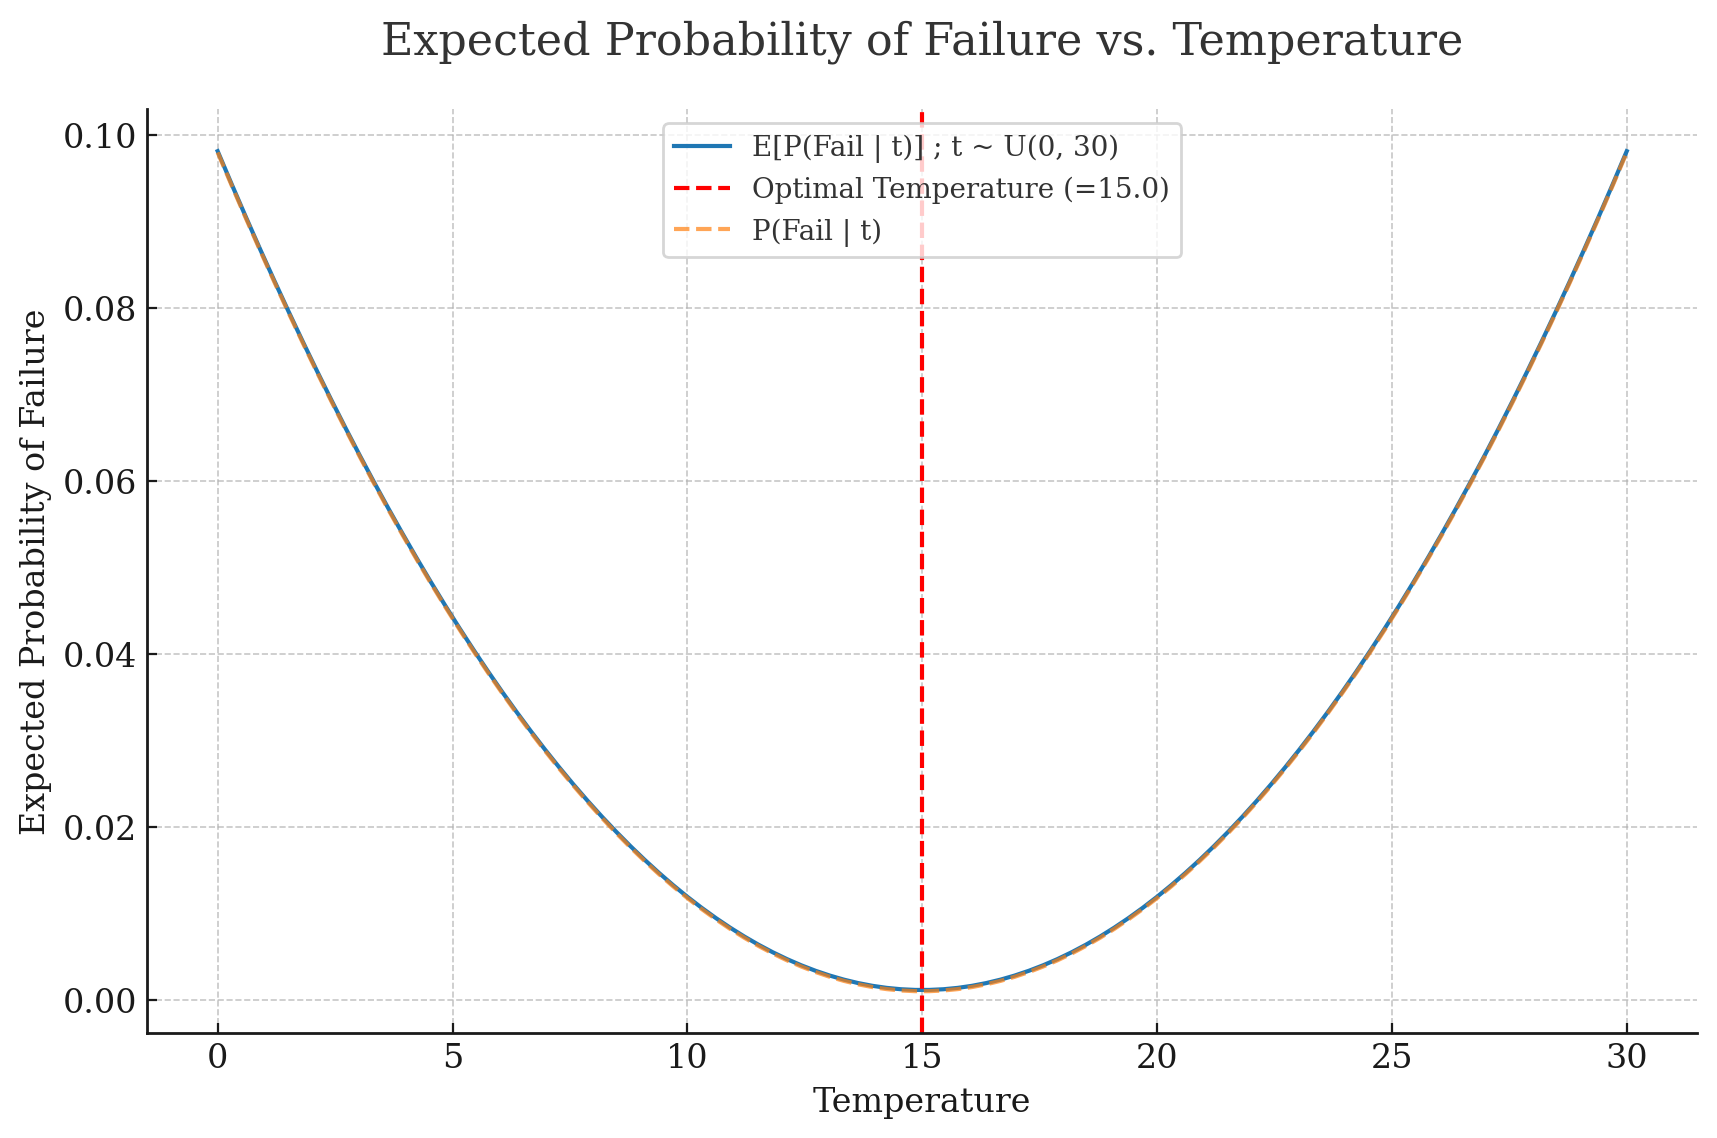

In [15]:
# def plot_E_prob_fail():

#     temperatures = np.linspace(0, 30, 100)
#     E_probs = [E_prob_fail_given_t(mu) for mu in temperatures]

#     plt.plot(temperatures, E_probs, label='E[P(Fail | t)]')
#     plt.axvline(x=optimal_temp, color='r', linestyle='--', label=f'Optimal Temperature ({optimal_temp:.2f}°C)')
#     plt.title("Expected Probability of Failure vs. Temperature Setting")
#     plt.xlabel("Temperature Setting")
#     plt.ylabel("Expected Probability of Failure")
#     plt.legend()
#     plt.show()

# plot_E_prob_fail
temperatures = np.linspace(0, 30, 100)
E_prob = [E_prob_fail_given_t(t) for t in temperatures]
plt.plot(temperatures, E_prob, label='E[P(Fail | t)] ; t ~ U(0, 30)')
plt.axvline(x=optimal_temp, color='r', linestyle='--', label=f'Optimal Temperature (={optimal_temp})')
plt.title("Expected Probability of Failure vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Expected Probability of Failure")
plt.legend()

# plot_P_fail_given_t
P_fail = P_fail_given_t(temperatures)
plt.plot(temperatures, P_fail, label='P(Fail | t)', alpha=0.7, linestyle='--')
plt.legend()

plt.show()

**Answer**:

Hamtaro should set temperature to $15$ degree Celcius, because its the optimal temp that minimize expected/probability of failure.

2. What is the probability of failure at the temperature used in part 1?

In [16]:
print(f"Temperature: {optimal_temp} degrees Celsius")
print(f"Probability of failure: {P_fail_given_t(optimal_temp)}")
print(f"Expected probability of failure: {E_prob_fail_given_t(optimal_temp)}")

Temperature: 15.0 degrees Celsius
Probability of failure: 0.001
Expected probability of failure: 0.0011437037037037036


**Answer**:

Probability of failure at the temperature(15 deg Celsius) used in part 1 $= 0.001$

3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.

![image](Q10-3.jpg)

In [17]:
def required_disks(p_fail_single_disk, n_reqs=10000, threshold=0.0001):
    N = 1

    # Iterate until condition satisfied
    while not (((1-p_fail_single_disk**N)**(n_reqs-1)) * (1+(n_reqs-1)*p_fail_single_disk**N)) > (1-threshold):
        N += 1

    return N

p = P_fail_given_t(optimal_temp)
min_disks = required_disks(p)
print(f"Minimum number of disks required: {min_disks}")

Minimum number of disks required: 2


4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

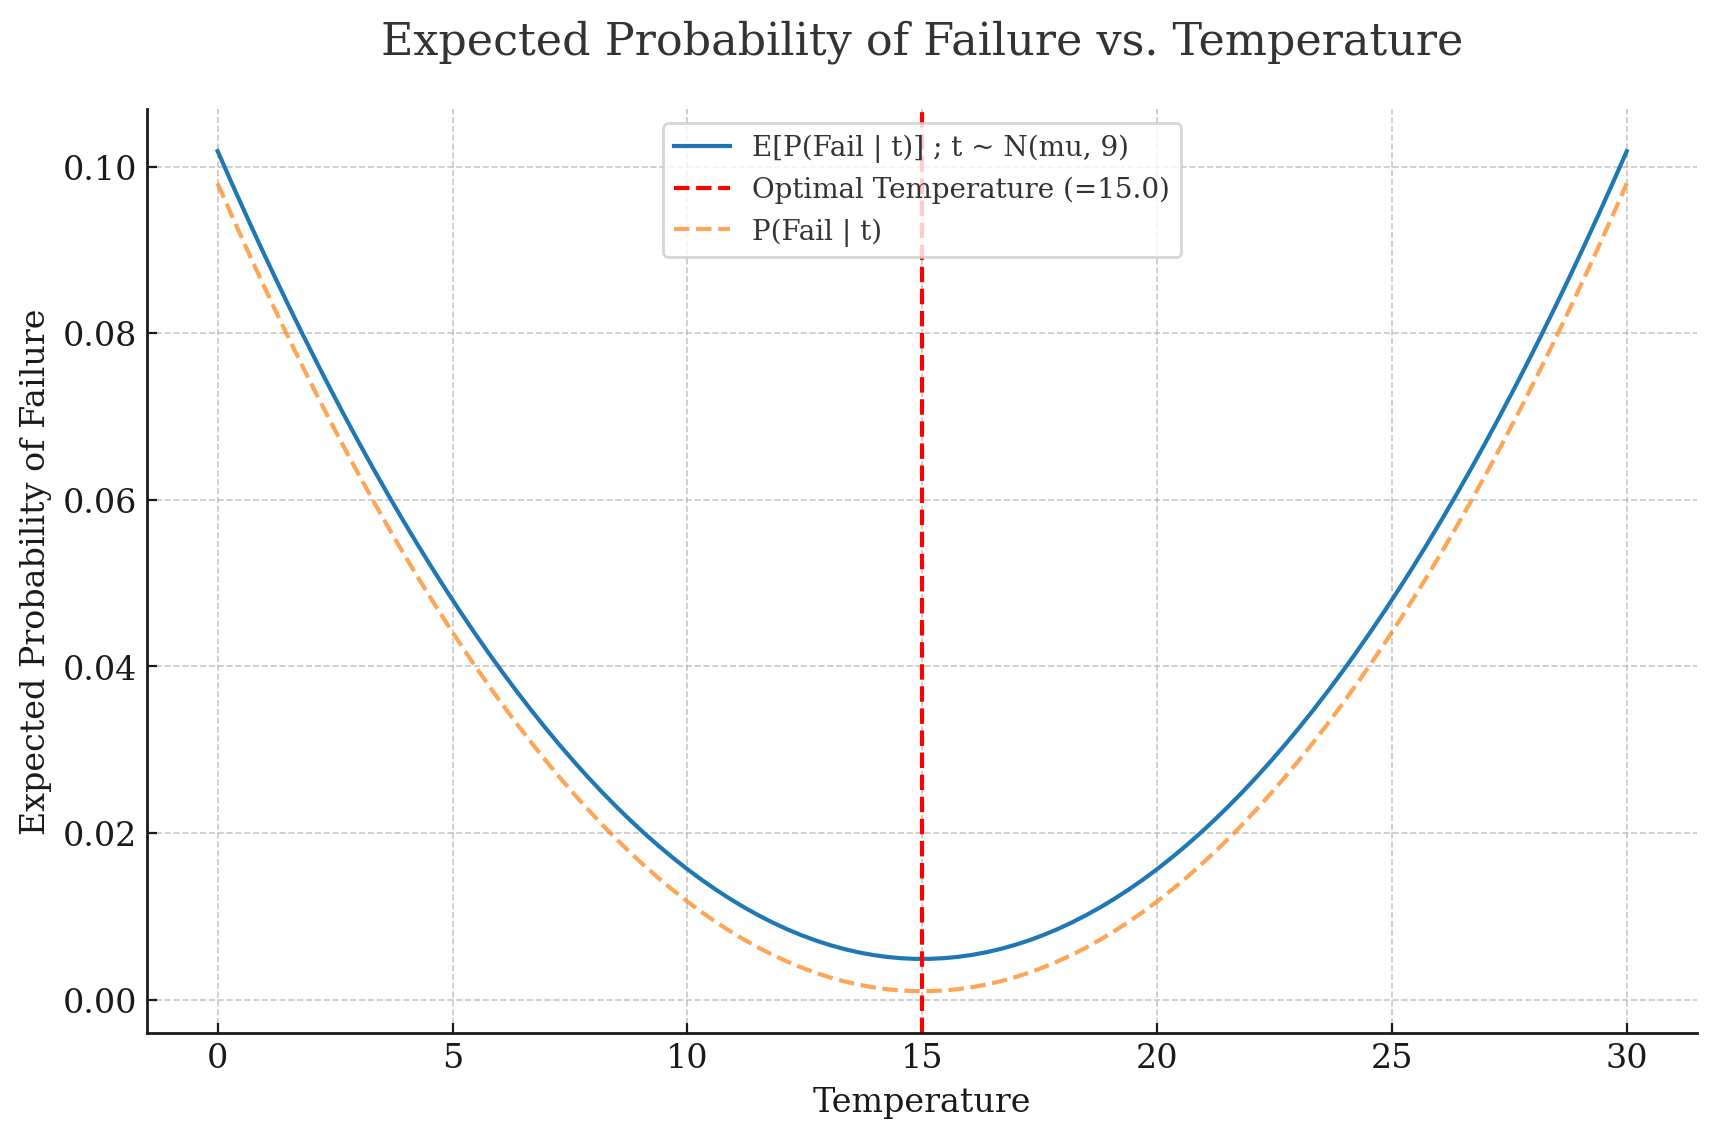

Temperature: 15.000000000000076 degrees Celsius
Probability of failure: 0.001
Expected probability of failure: 0.004880000000025307
Minimum number of disks required: 2


In [18]:
from scipy.stats import norm

def P_fail_given_t(t):
    return (0.97 / 2250) * (t - 15)**2 + 0.001

def E_prob_fail_given_t(mu):
    # Integrate P(Fail | t) over t ~ N(mu, 9)
    integrand = lambda t: P_fail_given_t(t) * norm.pdf(t, loc=mu, scale=3)
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

# plot_E_prob_fail
temperatures = np.linspace(0, 30, 100)
E_prob = [E_prob_fail_given_t(t) for t in temperatures]
plt.plot(temperatures, E_prob, label='E[P(Fail | t)] ; t ~ N(mu, 9)')
plt.axvline(x=optimal_temp, color='r', linestyle='--', label=f'Optimal Temperature (={optimal_temp})')
plt.title("Expected Probability of Failure vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Expected Probability of Failure")
plt.legend()

# plot_P_fail_given_t
P_fail = P_fail_given_t(temperatures)
plt.plot(temperatures, P_fail, label='P(Fail | t)', alpha=0.7, linestyle='--')
plt.legend()

plt.show()

optimal_temp = minimize_scalar(E_prob_fail_given_t, bounds=(0, 30), method='bounded').x

print(f"Temperature: {optimal_temp} degrees Celsius")
print(f"Probability of failure: {P_fail_given_t(optimal_temp)}")
print(f"Expected probability of failure: {E_prob_fail_given_t(optimal_temp)}")

def required_disks(p_fail_single_disk, n_reqs=10000, threshold=0.0001):
    N = 1

    # Iterate until condition satisfied
    while not (((1-p_fail_single_disk**N)**(n_reqs-1)) * (1+(n_reqs-1)*p_fail_single_disk**N)) > (1-threshold):
        N += 1

    return N

p = P_fail_given_t(optimal_temp)
min_disks = required_disks(p)
print(f"Minimum number of disks required: {min_disks}")

# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?

2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.

3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.

4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

**Solution**:

1. Which pairs of coins are independent? Why?

$\therefore$ $(a, b)$, $(b, c)$, $(b, d)$ are independent because the covariance between them are zero, show that they are no linear relationship between them.

2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.

In [19]:
initial_price = 10.0
mu = np.array([1.003, 1.002, 1.004, 1.004])
Sigma = np.array([
    [10e-3, 0, 4e-3, 5e-3],
    [0, 3e-3, 0, 0],
    [4e-3, 0, 12e-3, 2e-3],
    [5e-3, 0, 2e-3, 15e-3]
])

def simulate_prices(days, num_simulations=10000):

    prices = np.full((4, num_simulations), initial_price, dtype=float)

    for day in range(days):
        rates = np.random.multivariate_normal(mu, Sigma, num_simulations).T
        prices *= rates

    return prices

def expected_return(days, num_simulations=10000):

    final_prices = simulate_prices(days, num_simulations)

    returns = final_prices - initial_price # (4, num_simulations)

    expected_returns = returns.mean(axis=1)

    return expected_returns


expected_return_30 = expected_return(30)
expected_return_180 = expected_return(180)
print("Expected Return at T=30:", expected_return_30)
print("Expected Return at T=180:", expected_return_180)

Expected Return at T=30: [0.90866403 0.57531368 1.16198946 1.2406676 ]
Expected Return at T=180: [ 7.13601592  4.39419739 10.94731396 12.42600412]


3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.

In [20]:
def profitability_and_variance(days, num_simulations=10000):

    final_prices = simulate_prices(days, num_simulations)

    returns = final_prices - initial_price

    profit_probabilities = np.mean(final_prices > initial_price, axis=1)

    # Variance of returns
    return_variances = np.var(returns, axis=1)

    return profit_probabilities, return_variances


profit_prob_30, variance_30 = profitability_and_variance(30)
profit_prob_180, variance_180 = profitability_and_variance(180)

print("Profit Probability at T=30:", profit_prob_30)
print("Return Variance at T=30:", variance_30)
print("Profit Probability at T=180:", profit_prob_180)
print("Return Variance at T=180:", variance_180)


Profit Probability at T=30: [0.4589 0.5232 0.4603 0.4423]
Return Variance at T=30: [42.35110255 10.61411025 50.64862589 70.86583145]
Profit Probability at T=180: [0.3907 0.5487 0.4032 0.3434]
Return Variance at T=180: [2178.71065734  141.32311792 2236.00667812 5536.30617303]


4. How can the expected return be positive while having around 50\% chance of profitability?

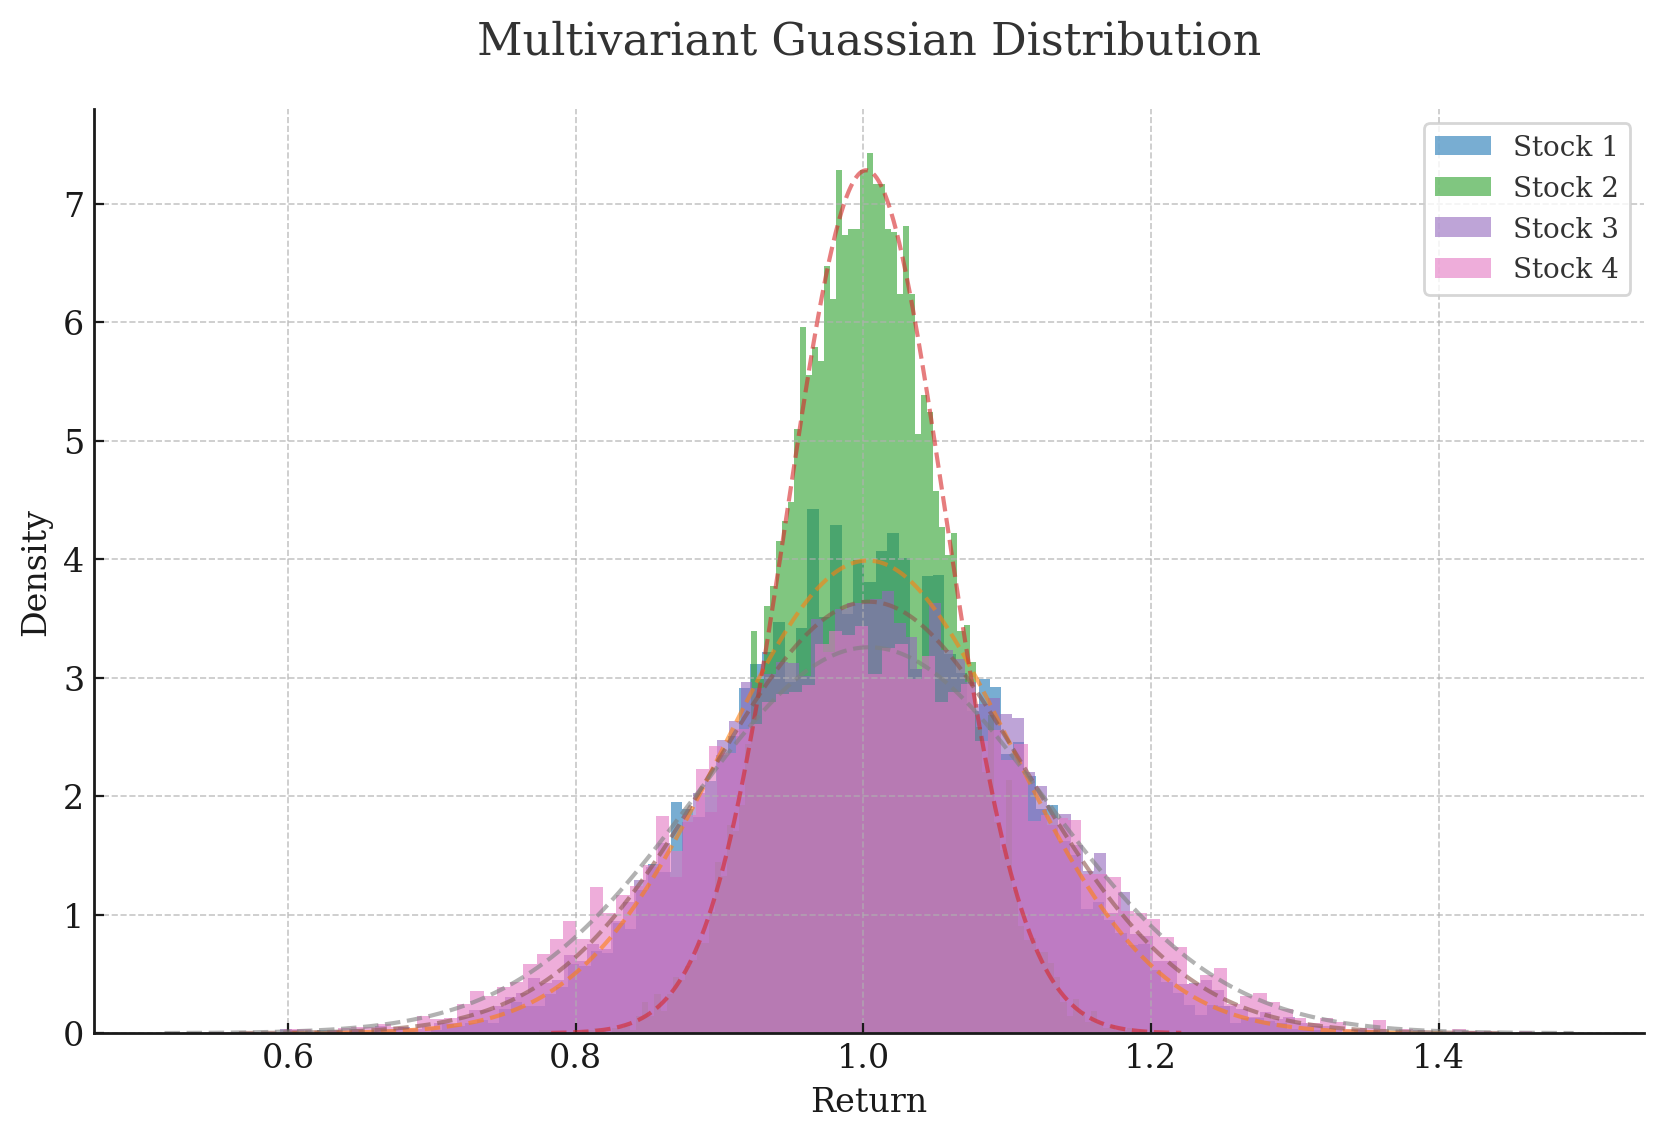

In [21]:
def plot_multivariate_normal(num_simulations=10000):

        rates = np.random.multivariate_normal(mu, Sigma, num_simulations).T

        for i in range(4):
            plt.hist(rates[i], bins=100, density=True, alpha=0.6, label=f"Stock {i+1}")
            # True PDF
            x = np.linspace(mu[i] - 4*np.sqrt(Sigma[i,i]), mu[i] + 4*np.sqrt(Sigma[i,i]), 1000)
            plt.plot(x, norm.pdf(x, mu[i], np.sqrt(Sigma[i,i])), linestyle='--', alpha=0.6)


        plt.title("Multivariant Guassian Distribution")
        plt.xlabel("Return")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

plot_multivariate_normal()

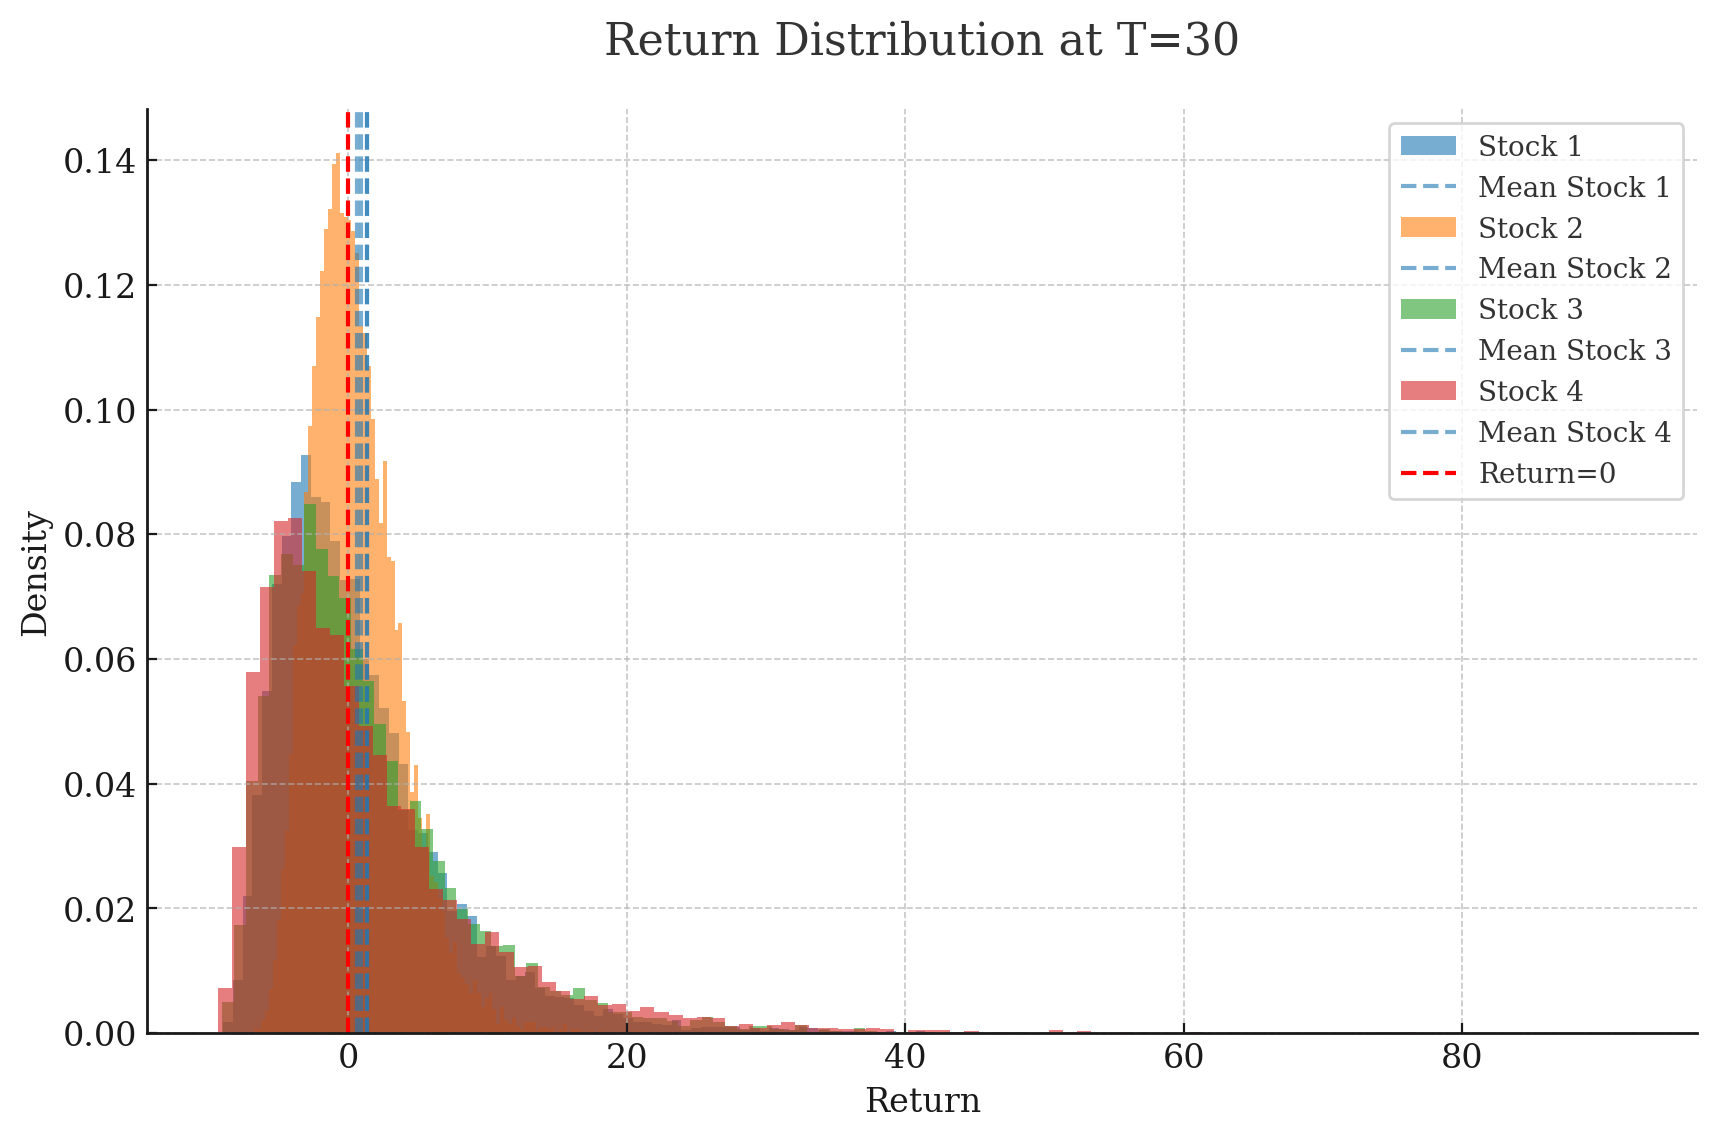

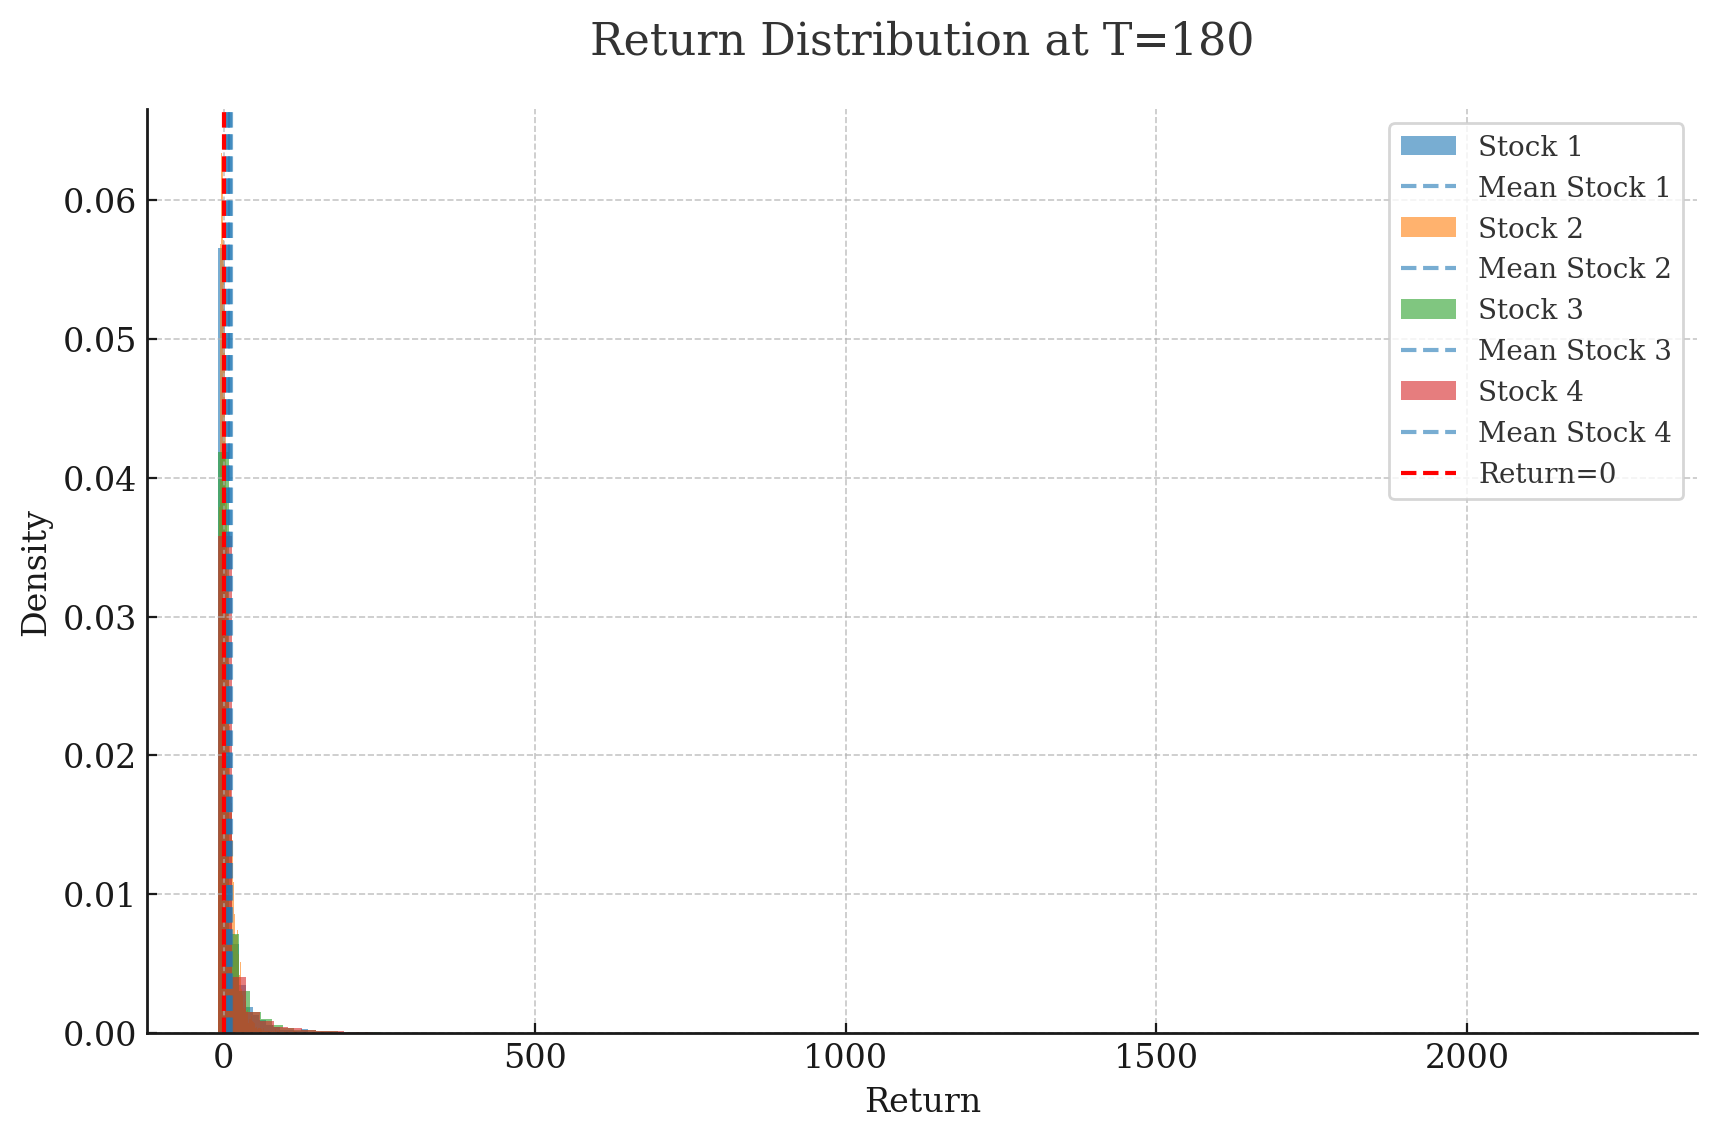

In [22]:
def plot_return_distribution(days, num_simulations=10000):

        returns = simulate_prices(days, num_simulations) - initial_price

        for i in range(4):
            plt.hist(returns[i], bins=100, density=True, alpha=0.6, label=f"Stock {i+1}")
            # Mean
            plt.axvline(x=returns[i].mean(), linestyle='--', alpha=0.6, label=f"Mean Stock {i+1}")

        plt.axvline(x=0, color='r', linestyle='--', label='Return=0')
        plt.title(f"Return Distribution at T={days}")
        plt.xlabel("Return")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

plot_return_distribution(30)
plot_return_distribution(180)

$\therefore$ Expected return be positive while having around 50\% chance of profitability because, 
return distribution is **right-skewed**, so when calculating the expected return using the arithmetic mean(equal weight), the high returns will offset the low returns, resulting in a positive expected return.

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).

In [23]:
def portfolio_return(strategy, days, num_simulations=10000):

    final_prices = simulate_prices(days, num_simulations)

    returns = final_prices - initial_price

    weights = np.array(strategy) / 100
    portfolio_returns = np.dot(weights, returns)  # Weighted sum of returns for each stock


    expected_return = np.mean(portfolio_returns)
    variance_return = np.var(portfolio_returns)
    profit_probability = np.mean(portfolio_returns > 0)

    return expected_return, variance_return, profit_probability


strategies = [
    [100, 0, 0, 0],    # Strategy 1
    [0, 100, 0, 0],    # Strategy 2
    [0, 0, 100, 0],    # Strategy 3
    [0, 0, 0, 100],    # Strategy 4
    [50, 50, 0, 0],    # Strategy 5
    [50, 0, 50, 0],    # Strategy 6
    [50, 0, 0, 50]     # Strategy 7
]


results_30 = [portfolio_return(strategy, 30) for strategy in strategies]
results_180 = [portfolio_return(strategy, 180) for strategy in strategies]


print("Results at T=30:")
for i, result in enumerate(results_30, 1):
    print(f"Strategy {i}: Expected Return = {result[0]:.4f}, Variance = {result[1]:.4f}, Profit Probability = {result[2]:.4f}")

print("\nResults at T=180:")
for i, result in enumerate(results_180, 1):
    print(f"Strategy {i}: Expected Return = {result[0]:.4f}, Variance = {result[1]:.4f}, Profit Probability = {result[2]:.4f}")


Results at T=30:
Strategy 1: Expected Return = 0.9742, Variance = 42.5107, Profit Probability = 0.4611
Strategy 2: Expected Return = 0.6259, Variance = 10.7396, Profit Probability = 0.5160
Strategy 3: Expected Return = 1.3998, Variance = 55.2455, Profit Probability = 0.4729
Strategy 4: Expected Return = 1.0345, Variance = 66.8561, Profit Probability = 0.4267
Strategy 5: Expected Return = 0.7515, Variance = 12.5347, Profit Probability = 0.5144
Strategy 6: Expected Return = 1.1464, Variance = 32.4665, Profit Probability = 0.4926
Strategy 7: Expected Return = 1.0373, Variance = 37.1556, Profit Probability = 0.4763

Results at T=180:
Strategy 1: Expected Return = 7.2276, Variance = 1805.7804, Profit Probability = 0.3968
Strategy 2: Expected Return = 4.6383, Variance = 160.8604, Profit Probability = 0.5583
Strategy 3: Expected Return = 10.7539, Variance = 2514.5880, Profit Probability = 0.4067
Strategy 4: Expected Return = 9.4073, Variance = 3015.6332, Profit Probability = 0.3452
Strategy 5

6. Which strategy yields the highest return?

In [24]:
highest_return_strategy_30 = max(enumerate(results_30, 1), key=lambda x: x[1][0])
print(f"Highest return strategy at T=30 is Strategy {highest_return_strategy_30[0]} with Expected Return = {highest_return_strategy_30[1][0]:.4f}")

highest_return_strategy_180 = max(enumerate(results_180, 1), key=lambda x: x[1][0])
print(f"Highest return strategy at T=180 is Strategy {highest_return_strategy_180[0]} with Expected Return = {highest_return_strategy_180[1][0]:.4f}")


Highest return strategy at T=30 is Strategy 3 with Expected Return = 1.3998
Highest return strategy at T=180 is Strategy 3 with Expected Return = 10.7539


7. Which strategy is the safest one?

To find the safest strategy, we will look for the strategy that has the **lowest variance** of return.

In [25]:
safest_strategy_30 = min(enumerate(results_30, 1), key=lambda x: x[1][1])
print(f"Safest strategy at T=30 is Strategy {safest_strategy_30[0]} with Variance = {safest_strategy_30[1][1]:.4f}")

safest_strategy_180 = min(enumerate(results_180, 1), key=lambda x: x[1][1])
print(f"Safest strategy at T=180 is Strategy {safest_strategy_180[0]} with Variance = {safest_strategy_180[1][1]:.4f}")


Safest strategy at T=30 is Strategy 2 with Variance = 10.7396
Safest strategy at T=180 is Strategy 2 with Variance = 160.8604


8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).

$$
cov(r_a, r_c) = 4 \cdot 10^{-3}
\\
cov(r_a, r_d) = 5 \cdot 10^{-3}
$$

$$Strategy\ 6: A=50\%, C=50\%$$
$$Strategy\ 7: A=50\%, D=50\%$$

In [26]:
print("Return Variance at T=30:", variance_30)
print("Return Variance at T=180:", variance_180)

Return Variance at T=30: [42.35110255 10.61411025 50.64862589 70.86583145]
Return Variance at T=180: [2178.71065734  141.32311792 2236.00667812 5536.30617303]


Covariance of strategy depend on variance and covariance of assets.


Covariance tell how likely the two assets move together.

For strategy 6, 
- that consist of asset A(50%) and C(50%), 
- the covariance between A and C is 0.004, 

which is lower than strategy 7 
- that consist of asset A(50%) and D(50%), 
- the covariance between A and D is 0.005.

So for strategy 7, will have similar movement between assets more than strategy 6.




Variance tell the risk or volatility.

Variance for T=30:

In [27]:
print(f"Variance of the strategy 6 at T=30 is {results_30[5][1]:.4f}")
print(f"Variance of the strategy 7 at T=30 is {results_30[6][1]:.4f}")

Variance of the strategy 6 at T=30 is 32.4665
Variance of the strategy 7 at T=30 is 37.1556


At T=30, Strategy 6 has lower variance than strategy 7, 
because the variance of asset C is lower than asset D.

Variance for T=180:

In [28]:
print(f"Variance of the strategy 6 at T=180 is {results_180[5][1]:.4f}")
print(f"Variance of the strategy 7 at T=180 is {results_180[6][1]:.4f}")

Variance of the strategy 6 at T=180 is 1378.4685
Variance of the strategy 7 at T=180 is 2010.0481


At T=180, Strategy 7 has lower variance than strategy 6, because the variance of asset D is lower than asset C.

9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

General practice for good investment is $\textbf{Asset Allocation}$.
- https://www.investopedia.com/terms/a/assetallocation.asp#:~:text=Asset%20allocation%20is%20how%20investors,tolerance%2C%20and%20the%20investment%20horizon.

Asset allocation involves diversifying investments across different assets to reduce risk and also may reduce returns (in short term) but stable for long term investment. 
The assets selected should have different characteristics, with varying levels of risk (variance/volatility) and potential returns. 
Additionally, assets should have low correlation or covariance with each other. 

For example, if assets are within the same industry sector (high correlation/covariance), a downturn in that sector could impact the entire portfolio. In contrast, assets in different sectors are less likely to be affected simultaneously, helping to protect the portfolio from large losses (also high return).

Additional simulations to support the argument:

Strategy:
- High Cov: 50% A, 50% D
- Low Cov: 50% A, 50% B (Independent)

In [29]:
strategy_high_cov = [50, 0, 0, 50]
strategy_low_cov = [50, 50, 0, 0]

# Run simulations for T=365*10 (10 years) to observe long-term investment
year = 10
print(f"#Year: {year}")
high_cov_result = portfolio_return(strategy_high_cov, 365*year)
low_cov_result = portfolio_return(strategy_low_cov, 365*year)

print(f"High Covariance Portfolio (a and d): Expected Return = {high_cov_result[0]:.4f}, Variance = {high_cov_result[1]:.4f}, Profit Probability = {high_cov_result[2]:.4f}")
print(f"Low Covariance Portfolio (a and c): Expected Return = {low_cov_result[0]:.4f}, Variance = {low_cov_result[1]:.4f}, Profit Probability = {low_cov_result[2]:.4f}")

print(f"Expected Return Ratio (High/Low) = {high_cov_result[0]/low_cov_result[0]}")
print(f"Variance Ratio (High/Low) = {high_cov_result[1]/low_cov_result[1]}")
print(f"Profit Probability Ratio (High/Low) = {high_cov_result[2]-low_cov_result[2]}")

#Year: 10
High Covariance Portfolio (a and d): Expected Return = 4130.6978, Variance = 18483397044.5316, Profit Probability = 0.1080
Low Covariance Portfolio (a and c): Expected Return = 7225.1530, Variance = 10339589583.5652, Profit Probability = 0.6701
Expected Return Ratio (High/Low) = 0.5717107804968959
Variance Ratio (High/Low) = 1.7876335317903662
Profit Probability Ratio (High/Low) = -0.5621


For Asset Allocation Portfolio with High covariance give ...x return higher than Low covariance portfolio 

In [30]:
print(f"Expected Return Ratio (High/Low) = {high_cov_result[0]/low_cov_result[0]}")

Expected Return Ratio (High/Low) = 0.5717107804968959


but come up with ...x risk(volatility/variance).

In [31]:
print(f"Variance Ratio (High/Low) = {high_cov_result[1]/low_cov_result[1]}")

Variance Ratio (High/Low) = 1.7876335317903662


Risk-return ratio

In [32]:
print(f"Risk-Return ratio HighCov: {high_cov_result[1]/high_cov_result[0]}")
print(f"Risk-Return ratio LowCov: {low_cov_result[1]/low_cov_result[0]}")
print(f"Risk-Return ratio HighCov/LowCov: {(high_cov_result[1]/high_cov_result[0])/(low_cov_result[1]/low_cov_result[0])}")

Risk-Return ratio HighCov: 4474642.727444815
Risk-Return ratio LowCov: 1431054.7663480684
Risk-Return ratio HighCov/LowCov: 3.1268144536939895
